In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (20, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df_og = pd.read_csv(r'C:\Users\Windows10\Desktop\Statistics & Data Mining\rakamin\bootcamp - data science batch 29\Train.csv')
df = df_og.copy()

# Statistika Deskriptif

## Variable in Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset di atas ada sebanyak 10.999 baris dari 12 variabel yang tersedia dengan tidak terdapat missing values dari masing-masing fitur yang tersedia.

In [5]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

Penjelasan dari beberapa variabel adalah sebagai berikut:
- ID : Nomor ID pelanggan.
- Warehouse_block : Warehouse (gudang) besar dari perusahaan yang dibagi menjadi beberapa blok, yaitu A, B, C, D, dan E.
- Mode of Shipment : Cara pengiriman produk, yang meliputi jalur laut (Ship), jalur udara (Flight), dan jalur darat (Road).
- Customer_care_calls : Jumlah panggilan yang dilakukan untuk pelacakan pengiriman.
- Customer_rating : Rating/penilaian dari pelanggan, dimulai dari 1 terendah (terburuk) sampai 5 tertinggi (terbaik).
- Cost_of_the_Product : Biaya produk (dalam US Dollars).
- Prior_purchases : Jumlah pembelian sebelumnya.
- Product_importance : Kategori produk, dari Low (rendah), Medium (sedang), dan High (Tinggi).
- Gender : Jenis kelamin, Male (Laki-laki) dan Female (Perempuan).
- Discount_offered : Banyak diskon yang ditawarkan untuk produk tertentu.
- Weight_in_gms : Berat produk (dalam satuan gram)
- Reached.on.Time_Y.N : Ketepatan produk tiba ke destinasi pelanggan, yaitu angka **1** menunjukkan produk **tidak sampai tepat waktu** dan angka **0** menunjukkan produk **sampai tepat waktu**.

In [4]:
# Pengelompokkan kolom berdasarkan tipe datanya
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

Kolom-kolom dari dataset di atas dikelompokkan berdasarkan tipe datanya sebagai berikut:
- Category : Kolom Warehouse_block, Mode_of_Shipment, Product_importance, Gender
- Numeric : Kolom Customer_care_calls, Customer_rating, Cost_of_the_product, Prior_purchases, Discount_offered, Reached.on.Time_Y.N

Karena kolom **Reached.on.Time_Y.N** sudah **diencode** sehingga kita akan membuat variabel baru yang bertipe data numerik dengan menghilangkan kolom tersebut.

In [5]:
nums2 = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

## Statistical Summary

In [10]:
df[nums2].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     10999.000000      10999.000000   10999.000000  
mean          3.567597         13.373216    3634.016729  
std           1.522860         16.205527    1635.377251  
min           2.000000          1.000000    1001.000000  
25%           3.000000          4.000000    1839.500000  
50%           3.000000          7.000000    4149.000000  
75%           4.000000         10.000000    5050.000000  
max          10.000000         65.000000    7846.000000

Seperti penjelasan sebelumnya, jumlah masing-masing variabel ada sebanyak 10.999 baris. Adapun beberapa ringkasan statistik yang diperoleh sebagai berikut:
- Tidak terdapat penyimpangan nilai pada setiap kolomnya, artinya nilai-nilai yang tersedia pada dataset masih masuk akal.
- Nilai min/max masih berada dalam batas wajar dari mean/median pada variabel setiap kolomnya.
- Pendeteksian outlier berdasarkan output di atas jika menggunakan IQR, yaitu min (Q1 - 1.5 x IQR) dan max (Q3 + 1.5 x IQR), maka prediksi awal kolom yang akan memiliki **outlier** adalah kolom **Prior_purchases** dan **Discount_offered**. Penjelasannya: a). Pada kolom Prior_purchases, batas maxnya adalah 5,5 sedangkan nilai max pada kolom tersebut adalah 10 sehingga kemungkinan pada kolom ini akan ada yang outlier. b). Pada kolom Discount_offered pun juga begitu, batas maxnya adalah 19, sedangkan nilai max pada kolom tersebut adalah 65 sehingga kemungkinan pada kolom ini juga akan ada yang outlier.
- Pendeteksian kemiringan/skewed grafik didasarkan pada perbedaan nilai mean dan median (mean > median), sehingga kolom yang akan skewed adalah Discount_offered dan Prior_purchases (Positively skewed, didasarkan juga pada prediksi outlier yang melebih nilai batas tertinggi dari outlier).
- Kolom Customer_care_calls dan Customer_rating memiliki distribusi yang simetris karena nilai median mendekati nilai mean yang ada.
- Kolom Cost_of_the_Product dan Weight_in_gms memiliki perbedaan nilai mean dan median (mean < median). Akan tetapi, jika diperhatikan lebih seksama, nilai dari setiap pengukuran statistik yang dikeluarkan tidak beda jauh, sehingga tidak dapat disimpulkan kedua kolom ini akan skewed.

In [12]:
df[cats].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

Dari output yang dihasilkan diperoleh:
- Kategori Warehouse_block didominasi oleh blok F, sejumlah 3666.
- Kategori Gender didominasi oleh gender Perempuan, sebanyak 5545.
- Kategori Product_importance didominasi oleh kategori Low, sebanyak 5297.
- Kategori Mode_of_shipment didominasi oleh pengiriman jalur laut (Ship), sejumlah 7462.

In [13]:
rot = df.groupby('Reached.on.Time_Y.N').agg({'ID':'count'}).reset_index()
rot.columns = ['reached_on_time', 'jumlah']
rot

reached_on_time  jumlah
0                0    4436
1                1    6563

In [14]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



Output di atas menjelaskan perincian dari setiap kolom yang bertipe kategori selain kolom Reached.on.Time_Y.N. Dari outputnya: 
- Kolom Warehouse_block memiliki value F sedangkan pada penjelasan dataset sebelumnya itu bloknya hanya terdiri dari A, B, C, D, dan E. Kemungkinan blok F ini akan diubah ke blok E yang tidak tersedia pada kolom ini.
- Kolom Mode_of_Shipment melalui pengiriman jalur **laut (Ship)** lebih **banyak** dibandingkan 2 jalur lainnya. 
- Kolom Product_importance yang kategorinya **high** memiliki jumlah lebih **sedikit** dibandingkan dua kategori lainnya.
- Kolom Gender **tidak ada perbedaan** yang signifikan antara Female dan Male dalam pembelian di e-commerce.

# Univariate Analysis

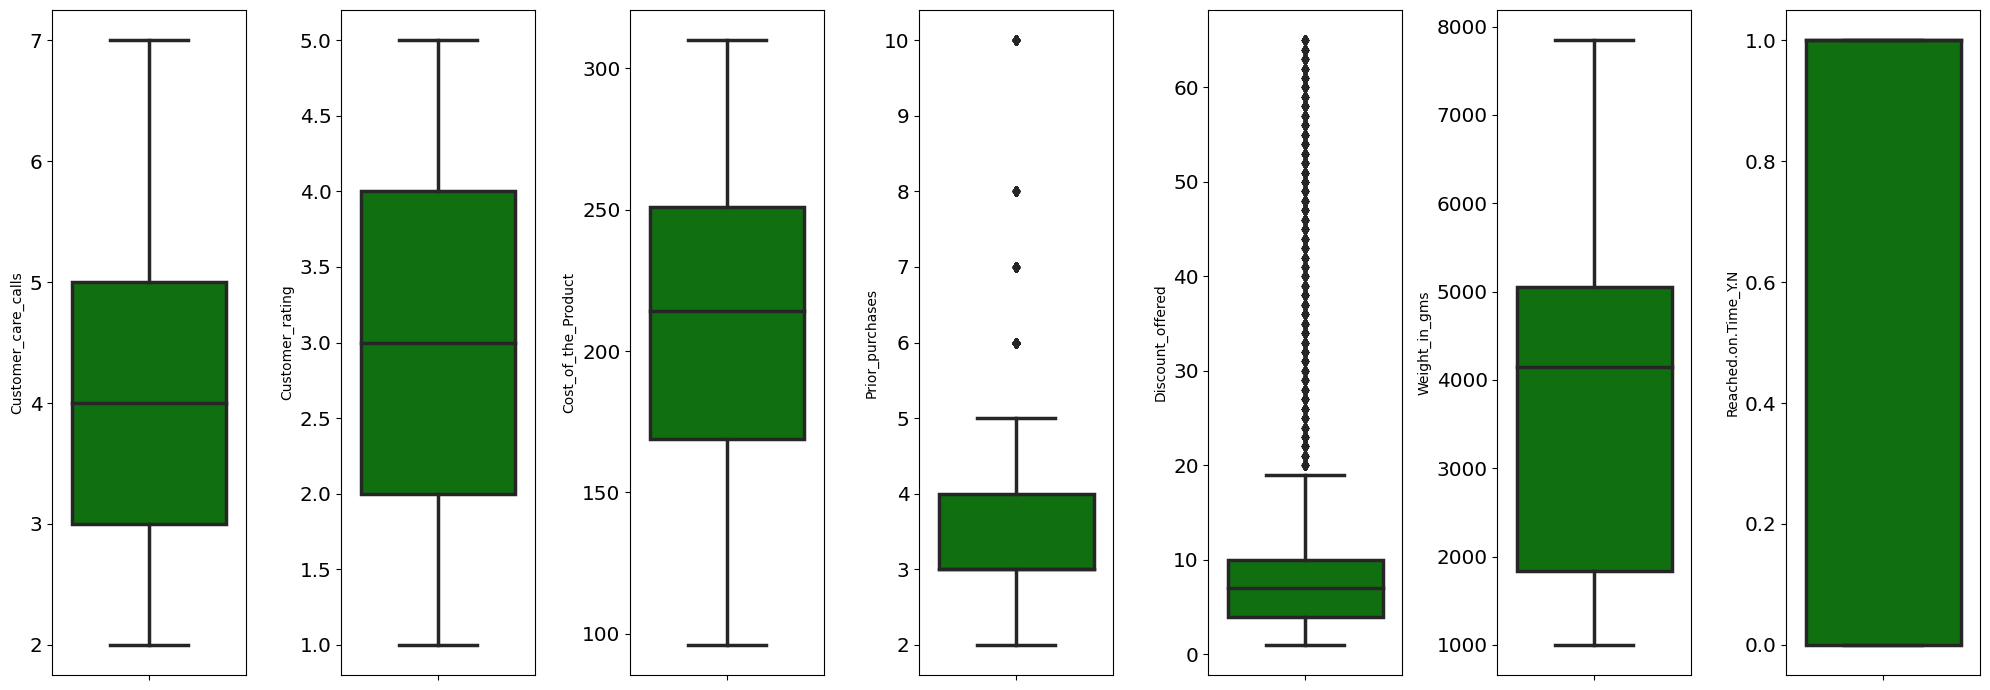

In [16]:
features = nums
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color = 'green', orient ='v')
  plt.tight_layout()

- Pada fitur **Prior_purchase** terdapat outlier yang mencolok dan tidak terlihat garis median di dalam kotak IQR.
- Pada fitur **Discount_offered** terdapat banyak sekali outlier dan berpotensi memiliki probabilitas distribusi **<i>right-skewed</i>**
- Pada fitur **Weight_in_gms** memiliki potensi probabilitas distribusi yang skewed.

***CATATAN UNTUK PRE-PROCESSING***
- Handle outlier dua kolom tersebut.

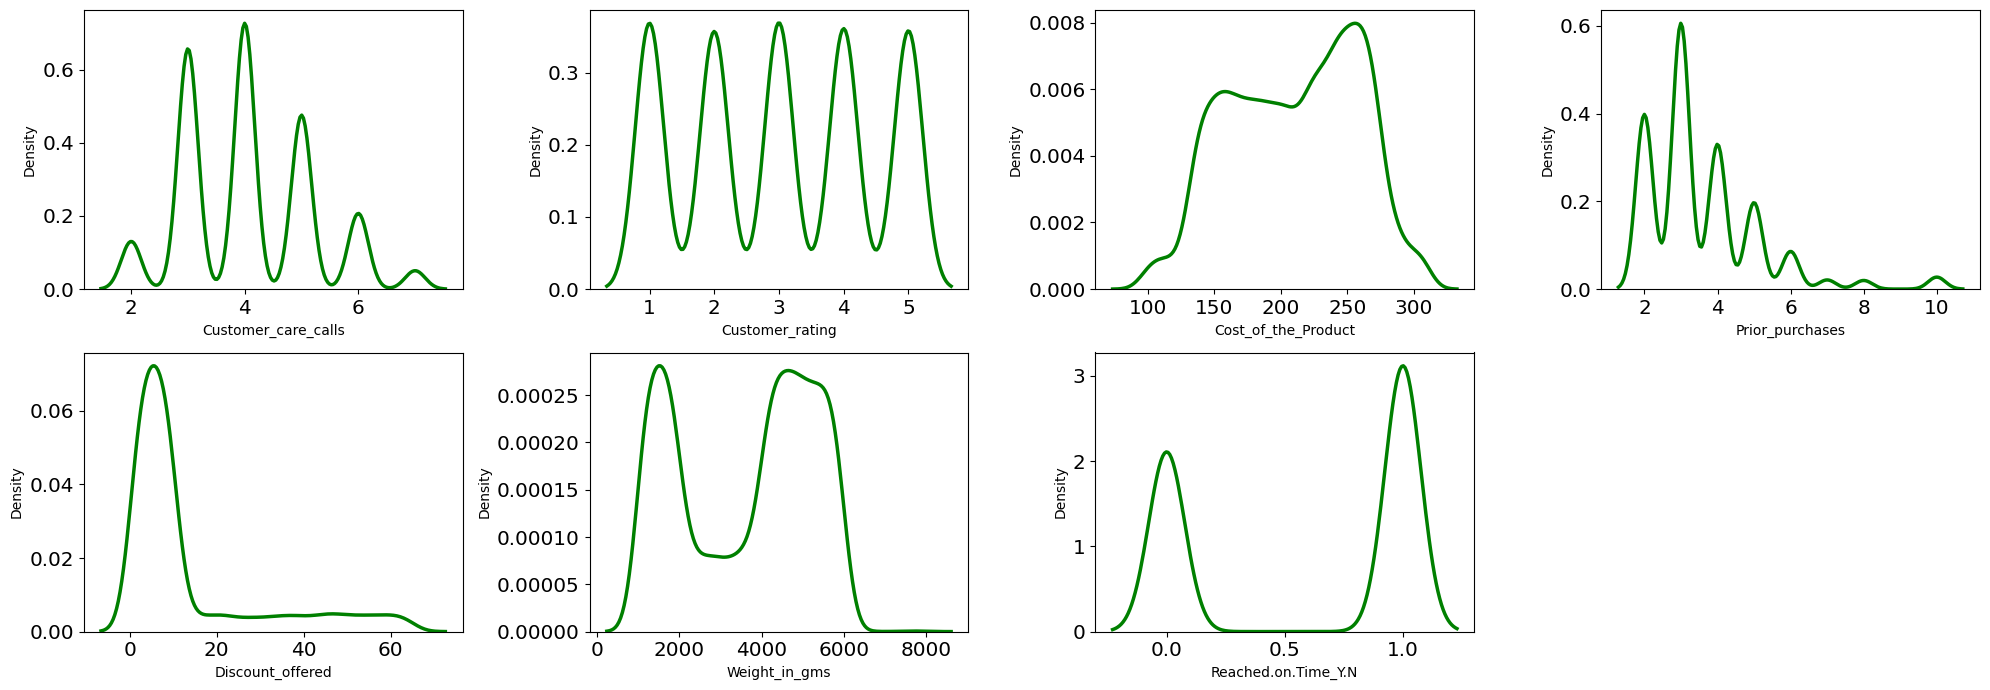

In [17]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.kdeplot(x=df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

**INSIGHT GRAFIK PROBABILITAS DISTRIBUSI - KDEPLOT**
- Distribusi pada fitur **Discount_offered** yang **<i>right-skewed</i>** terkonfirmasi.
- Pada fitur **Wight_in_gms** terdapat dua puncak (pada range 0 - 2000 dan 4000 - 6000). Butuh ditelaah lebih lanjut melalui Multivariate Analysis.

**BUSINESS INSIGHT**
- Pada fitur **Prior_purchase** terlihat grafik yang melandai di jumlah pembelian di atas 3. Hal ini bisa diartikan bahwa pelanggan yang menggunakan jasa shipping E-Commerce masih belum banyak memunculkan engagement yang besar. Perlu ditelaah lebih lanjut apa yang memicu pelanggan tersebut belum memiliki tingkat kepercayaan yang tinggi pada jasa shipping.

In [23]:
for column in nums:
    skewness = stats.skew(df[column])
    print(f"Skewness dari kolom {column}: {skewness}")

Skewness dari kolom Customer_care_calls: 0.3918723238934225
Skewness dari kolom Customer_rating: 0.00435900450181738
Skewness dari kolom Cost_of_the_Product: -0.15709569144775337
Skewness dari kolom Prior_purchases: 1.6816679361740619
Skewness dari kolom Discount_offered: 1.7986837686316186
Skewness dari kolom Weight_in_gms: -0.24971269621623338
Skewness dari kolom Reached.on.Time_Y.N: -0.39420353914024087


In [24]:
std = df[nums].std()
mean = df[nums].mean()

std

Customer_care_calls       1.141490
Customer_rating           1.413603
Cost_of_the_Product      48.063272
Prior_purchases           1.522860
Discount_offered         16.205527
Weight_in_gms          1635.377251
Reached.on.Time_Y.N       0.490584
dtype: float64

In [25]:
mean

Customer_care_calls       4.054459
Customer_rating           2.990545
Cost_of_the_Product     210.196836
Prior_purchases           3.567597
Discount_offered         13.373216
Weight_in_gms          3634.016729
Reached.on.Time_Y.N       0.596691
dtype: float64

In [26]:
# batas-batas yang berjarak 3 standar deviasi dari rata-rata.
# memilih 3 karena tingkat kepercayaan paling tinggi. 
# 1 = memperkirakan bahwa 68,27% data berada dalam rentang ini 
# 2 =  95,45% , 3 = 99,73%

batas_atas = mean + (3*std)
batas_bawah = mean - (3*std)

In [27]:
(df[nums] > batas_atas).sum()

Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases        178
Discount_offered       181
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64

In [28]:
(df[nums] < batas_bawah).sum()

Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [31]:
def batas_minimal(df, column):
    mean = df[column].mean()
    std = df[column].std()
    batas_bawah = mean - 3 * std
    return len(df[df[column] < batas_bawah])

for col in nums:
    count = batas_minimal(df, col)
    print(f"Data dibawah batas minimal {col}: {count}")

Data dibawah batas minimal Customer_care_calls: 0
Data dibawah batas minimal Customer_rating: 0
Data dibawah batas minimal Cost_of_the_Product: 0
Data dibawah batas minimal Prior_purchases: 0
Data dibawah batas minimal Discount_offered: 0
Data dibawah batas minimal Weight_in_gms: 0
Data dibawah batas minimal Reached.on.Time_Y.N: 0


In [34]:
def batas_maks (df, column):
    mean = df[column].mean()
    std = df[column].std()
    batas_atas = mean + 3 * std
    return len(df[df[column] > batas_atas])

for col in nums:
    count = batas_maks  (df, col)
    print(f"Data diatas batas maks {col}: {count}")

Data diatas batas maks Customer_care_calls: 0
Data diatas batas maks Customer_rating: 0
Data diatas batas maks Cost_of_the_Product: 0
Data diatas batas maks Prior_purchases: 178
Data diatas batas maks Discount_offered: 181
Data diatas batas maks Weight_in_gms: 0
Data diatas batas maks Reached.on.Time_Y.N: 0


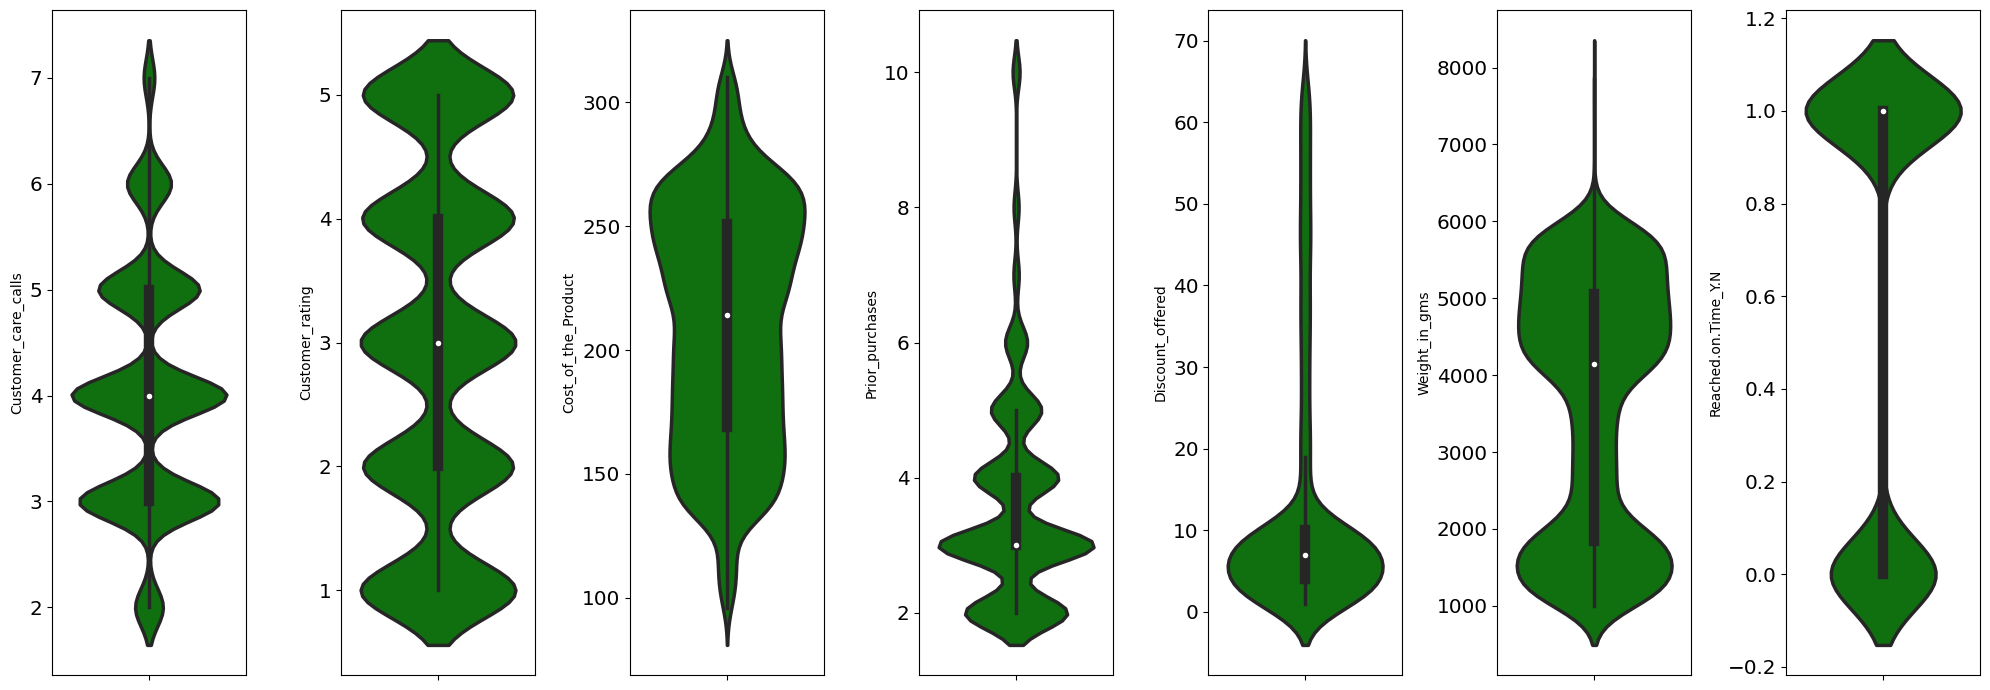

In [19]:
features = nums
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.violinplot(y=df[features[i]], color = 'green')
  plt.tight_layout()

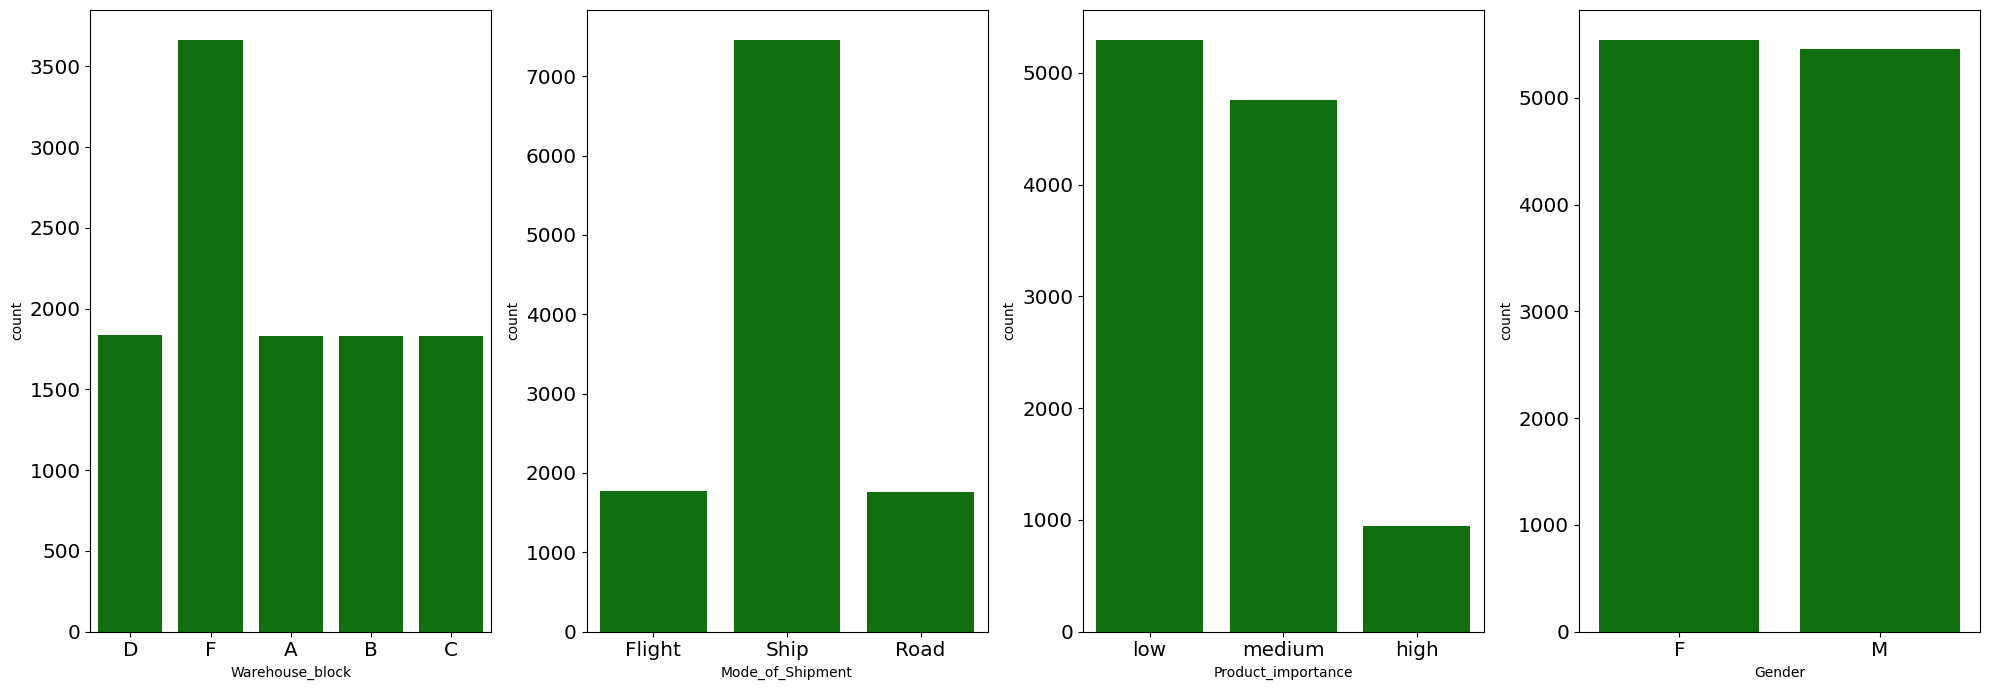

In [20]:
features = cats
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]], color = 'green')
  plt.tight_layout()

- Dalam barplot **Warehouse_block** terdapat penumpukan barang pada gudang F (Selanjutnya akan diganti menjadi gudang E karena dalam dataset Kaggle tidak disebutkan nama gudang F dalam kolom ini)
- Dalam barplot **Mode_of_Shipment**, pelanggan lebih banyak memilih moda transportasi pengiriman kapal.
- Dalam barplot **Product_importance**, pelanggan lebih memilih prioritas low & medium. Poin ini akan ditelaah lebih lanjut pada blok kode di bawah ini.

# Multivariate Analysis

C:\Users\Windows10\AppData\Local\Temp\ipykernel_9936\2982946165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


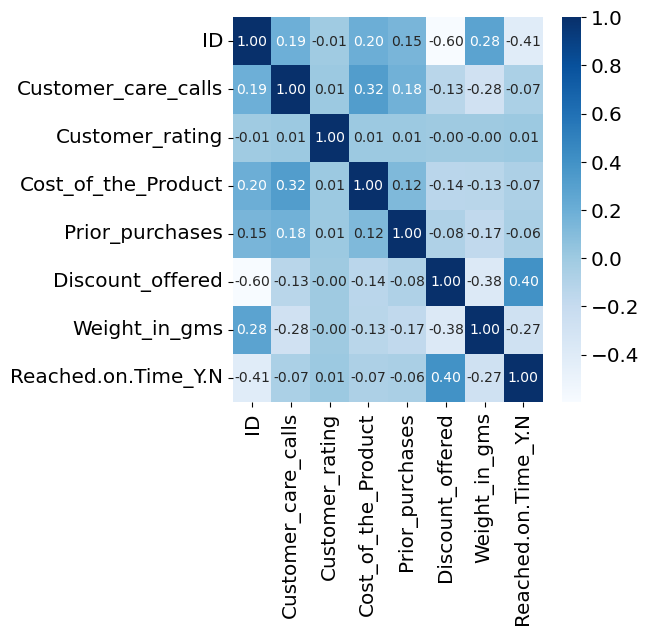

In [38]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [8]:
#groupby df berdasarkan 2 kolom kategorik dan diagregat dengan menghitung jumlah ID
pi = df.groupby(['Product_importance', 'Mode_of_Shipment']).agg({'ID':'count'}).reset_index()
pi

Product_importance Mode_of_Shipment    ID
0               high           Flight   163
1               high             Road   158
2               high             Ship   627
3                low           Flight   838
4                low             Road   857
5                low             Ship  3602
6             medium           Flight   776
7             medium             Road   745
8             medium             Ship  3233

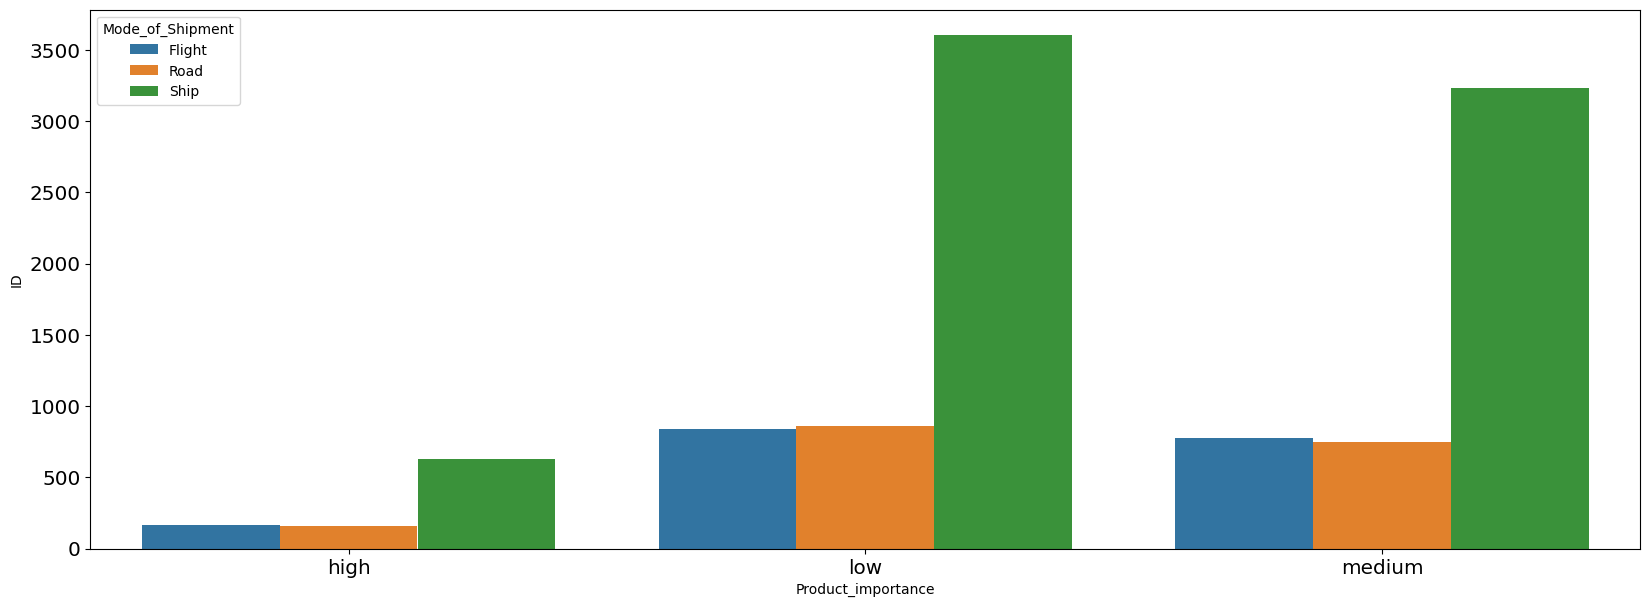

In [9]:
sns.barplot(data = pi, hue='Mode_of_Shipment', x= 'Product_importance', y='ID')
plt.show()

- Plot bar di atas menunjukkan bahwa walaupun secara kolektif moda transportasi kapal lebih dominan, moda transportasi pesawat lebih dipilih jika masuk ke dalam kategori ***high***. Hal yang sama juga ditemukan pada kategori ***medium*** dimana moda transportasi yang lebih banyak dipilih pelanggan adalah kendaraan darat (motor, truk, bus cargo, dll).

In [53]:
PIWB = df.groupby(['Product_importance', 'Warehouse_block']).agg({'ID':'count'}).reset_index()
PIWB

Product_importance Warehouse_block    ID
0                high               A   165
1                high               B   146
2                high               C   168
3                high               D   166
4                high               F   303
5                 low               A   909
6                 low               B   855
7                 low               C   874
8                 low               D   883
9                 low               F  1776
10             medium               A   759
11             medium               B   832
12             medium               C   791
13             medium               D   785
14             medium               F  1587

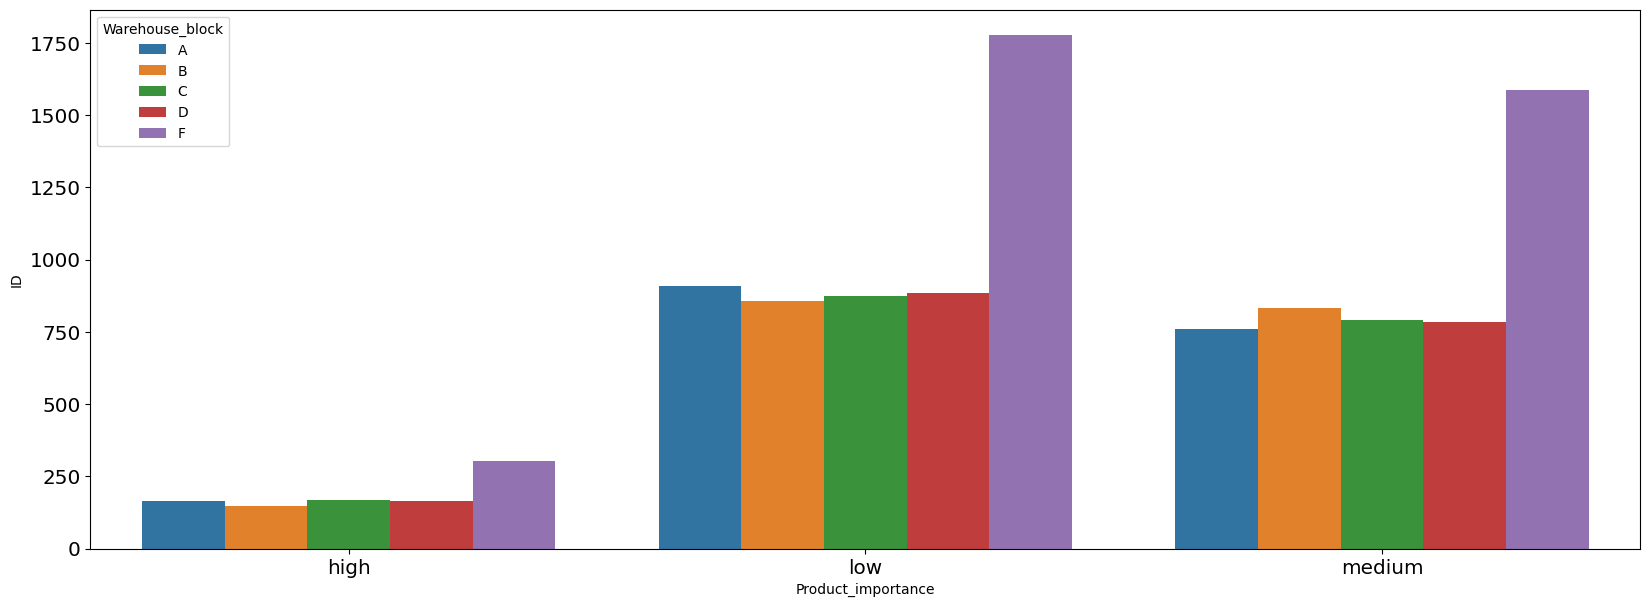

In [54]:
sns.barplot(data = PIWB, hue='Warehouse_block', x= 'Product_importance', y='ID')
plt.show()

In [55]:
WBMS= df.groupby(['Warehouse_block', 'Mode_of_Shipment']).agg({'ID':'count'}).reset_index()
WBMS

Warehouse_block Mode_of_Shipment    ID
0                A           Flight   297
1                A             Road   294
2                A             Ship  1242
3                B           Flight   296
4                B             Road   294
5                B             Ship  1243
6                C           Flight   295
7                C             Road   294
8                C             Ship  1244
9                D           Flight   297
10               D             Road   292
11               D             Ship  1245
12               F           Flight   592
13               F             Road   586
14               F             Ship  2488

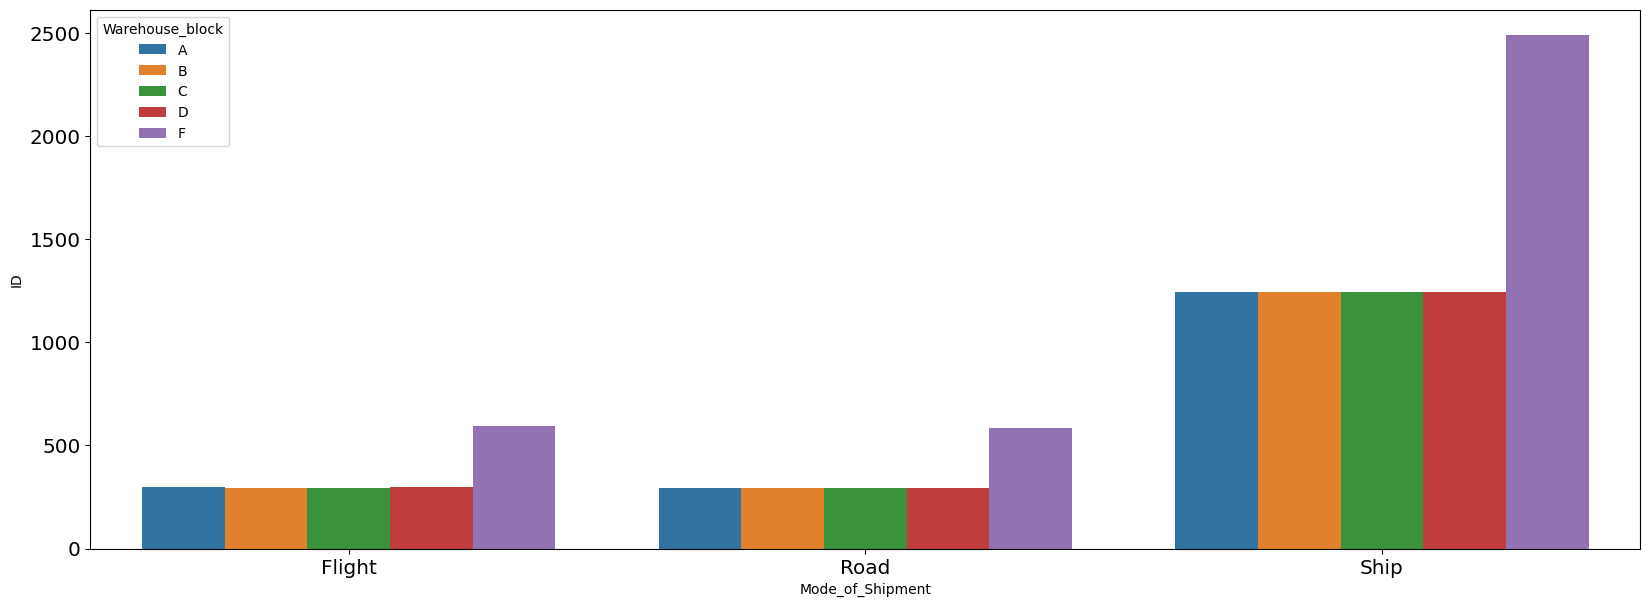

In [56]:
sns.barplot(data = WBMS, hue='Warehouse_block', x= 'Mode_of_Shipment', y='ID')
plt.show()

In [6]:
RTMS = df.groupby(['Reached.on.Time_Y.N', 'Mode_of_Shipment']).agg({'ID':'count'}).reset_index()
RTMS

Reached.on.Time_Y.N Mode_of_Shipment    ID
0                    0           Flight   708
1                    0             Road   725
2                    0             Ship  3003
3                    1           Flight  1069
4                    1             Road  1035
5                    1             Ship  4459

In [9]:
RTMS['Sum_by_on_Time'] = np.where(RTMS['Mode_of_Shipment'] == 'Flight', 708+1069, 
                                  np.where(RTMS['Mode_of_Shipment'] == 'Road', 725+1035, 3003+4459))
                                  
RTMS

Reached.on.Time_Y.N Mode_of_Shipment    ID  Sum_by_on_Time
0                    0           Flight   708            1777
1                    0             Road   725            1760
2                    0             Ship  3003            7462
3                    1           Flight  1069            1777
4                    1             Road  1035            1760
5                    1             Ship  4459            7462

In [10]:
RTMS['Percentage'] = RTMS['ID']/RTMS['Sum_by_on_Time']

In [11]:
RTMS

Reached.on.Time_Y.N Mode_of_Shipment    ID  Sum_by_on_Time  Percentage
0                    0           Flight   708            1777    0.398424
1                    0             Road   725            1760    0.411932
2                    0             Ship  3003            7462    0.402439
3                    1           Flight  1069            1777    0.601576
4                    1             Road  1035            1760    0.588068
5                    1             Ship  4459            7462    0.597561

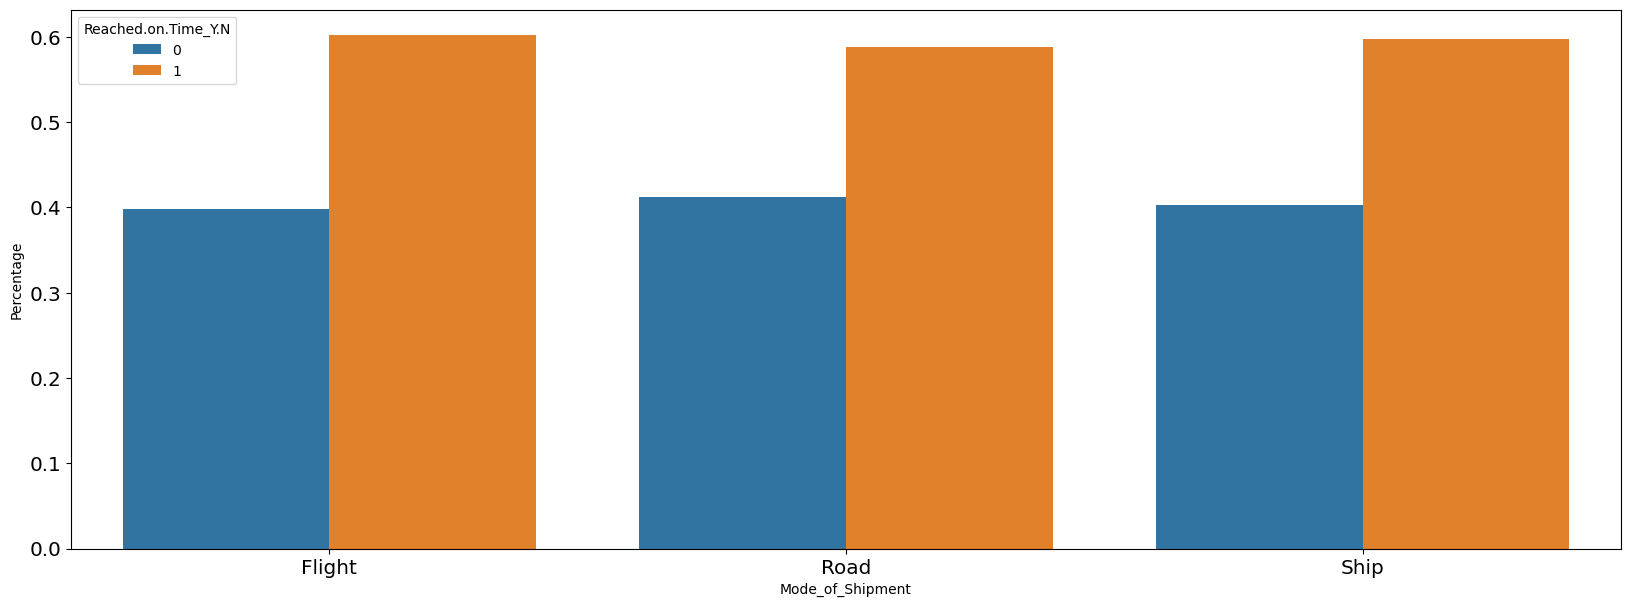

In [12]:
sns.barplot(data=RTMS, x='Mode_of_Shipment', y='Percentage', hue='Reached.on.Time_Y.N')
plt.show()

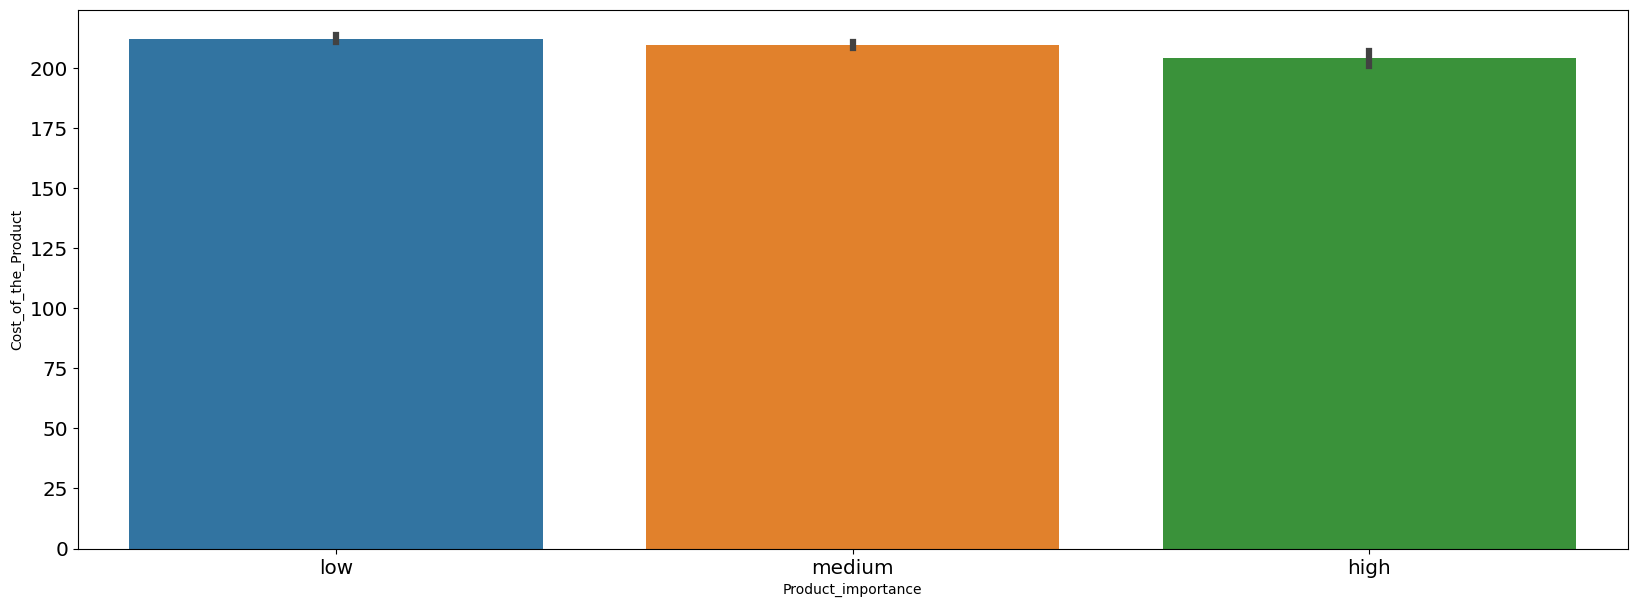

In [14]:
sns.barplot(data=df, x='Product_importance', y='Cost_of_the_Product')
plt.show()

In [17]:
df[df['Product_importance'] == 'high']['Cost_of_the_Product'].describe()

count    948.000000
mean     203.871308
std       46.698931
min       96.000000
25%      165.000000
50%      205.500000
75%      243.000000
max      307.000000
Name: Cost_of_the_Product, dtype: float64

In [18]:
df[df['Product_importance'] == 'medium']['Cost_of_the_Product'].describe()

count    4754.000000
mean      209.382415
std        47.576779
min        96.000000
25%       169.000000
50%       213.000000
75%       250.000000
max       310.000000
Name: Cost_of_the_Product, dtype: float64

In [26]:
CPI_1 = df.groupby('Product_importance').agg({'ID':'count',
                                            'Cost_of_the_Product':'mean',
                                             'Weight_in_gms':'mean'}).reset_index()

In [27]:
CPI_1

Product_importance    ID  Cost_of_the_Product  Weight_in_gms
0               high   948           203.871308    4005.551688
1                low  5297           212.059845    3497.488956
2             medium  4754           209.382415    3712.050484

In [28]:
CPI_1['Percentage'] = CPI_1['ID']/10999

In [29]:
CPI_1

Product_importance    ID  Cost_of_the_Product  Weight_in_gms  Percentage
0               high   948           203.871308    4005.551688    0.086190
1                low  5297           212.059845    3497.488956    0.481589
2             medium  4754           209.382415    3712.050484    0.432221

In [31]:
CPI_2 = df.groupby(['Product_importance', 'Mode_of_Shipment']).agg({'ID':'count',
                                            'Cost_of_the_Product':'mean',
                                             'Weight_in_gms':'mean'}).reset_index()

CPI_2['Percentage'] = CPI_2['ID']/10999

In [33]:
CPI_2

Product_importance Mode_of_Shipment    ID  Cost_of_the_Product  \
0               high           Flight   163           202.564417   
1               high             Road   158           203.050633   
2               high             Ship   627           204.417863   
3                low           Flight   838           210.875895   
4                low             Road   857           210.421237   
5                low             Ship  3602           212.725153   
6             medium           Flight   776           209.028351   
7             medium             Road   745           212.112752   
8             medium             Ship  3233           208.838231   

   Weight_in_gms  Percentage  
0    4069.871166    0.014820  
1    3974.487342    0.014365  
2    3996.658692    0.057005  
3    3536.021480    0.076189  
4    3498.372229    0.077916  
5    3488.314270    0.327484  
6    3637.667526    0.070552  
7    3754.543624    0.067733  
8    3720.112280    0.293936

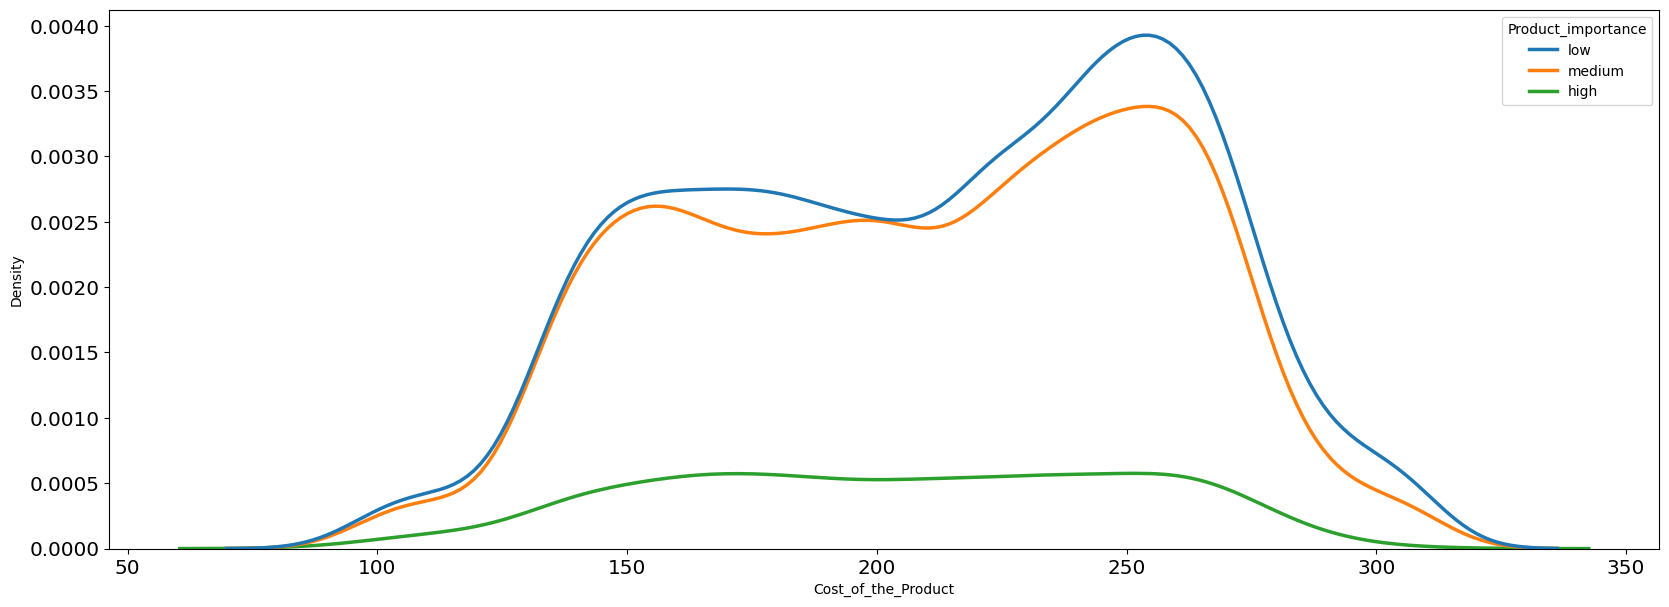

In [43]:
sns.kdeplot(data=df, x='Cost_of_the_Product', hue = 'Product_importance')
plt.show()

In [44]:
df[df['Product_importance'] == 'high'].shape

(948, 12)

In [45]:
df[df['Product_importance'] == 'medium'].shape

(4754, 12)

In [46]:
df[df['Product_importance'] == 'low'].shape

(5297, 12)

In [48]:
df['Weight_category'] = np.where(df['Weight_in_gms'] < 2000, 'kecil',
                                np.where(df['Weight_in_gms'] < 3999, 'sedang', 'besar'))

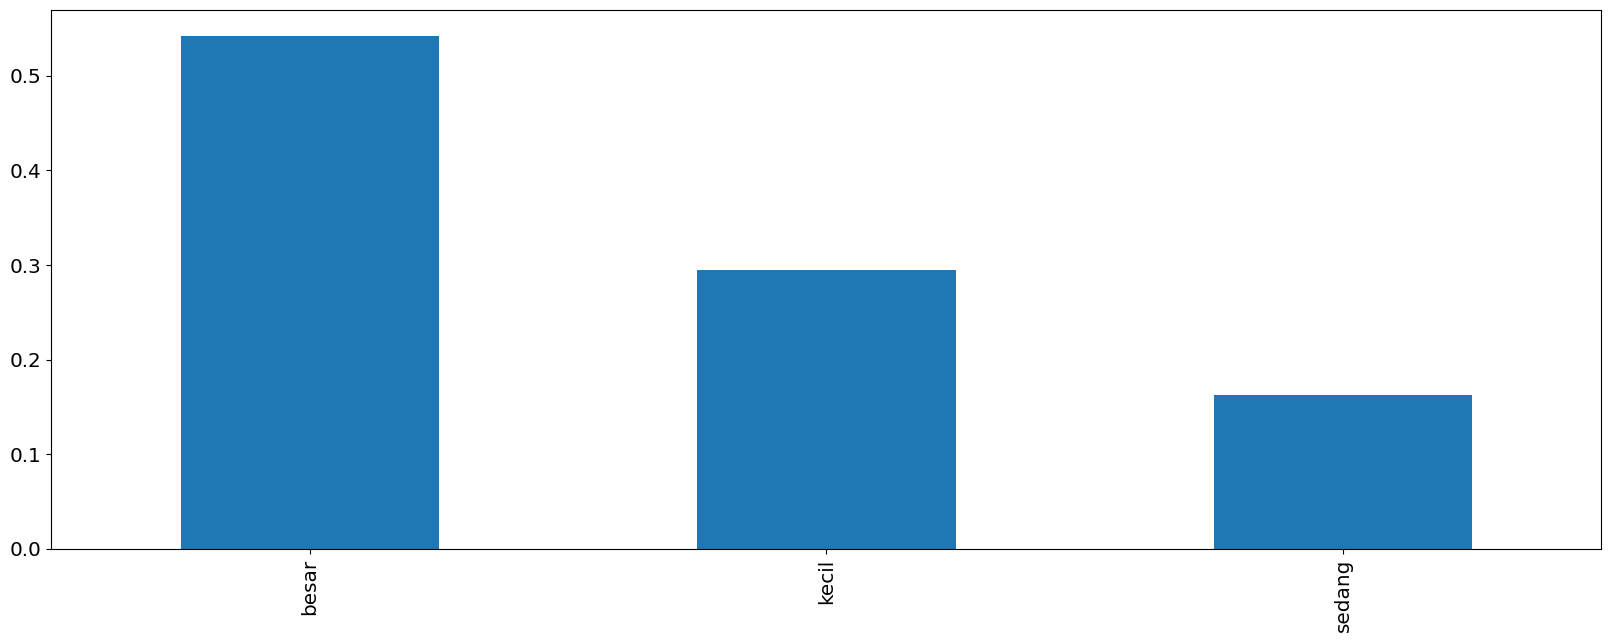

In [52]:
df['Weight_category'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
df['Weight_category'].value_counts(normalize=True).plot(kind='bar')

Dari heatmap korelasi antar feature diatas, dapat diambil beberapa kesimpulan yaitu:
- **Reached_on_time** memiliki korelasi **positif** dengan **Discount_offered**, sehingga kemungkinan semakin tinggi discount yang diberikan akan semakin memungkinkan untuk paket datang terlambat
- **Reached_on_time** memiliki korelasi **negatif** dengan **Weight_in_gms**, sehingga kemungkinan semakin berat beban yang diangkut maka semakin memungkinkan untuk paket datang tepat waktu
- **Weight_in_gms** memiliki korelasi **negatif** dengan **Discount_offered**, sehingga kemungkinan semakin tinggi discount yang diberikan, maka semakin ringan beban barang yang diangkut
- **Customer_care_calls** memiliki korelasi **positif** dengan **Cost_of_the_product**, sehingga kemungkinan semakin mahal barang yang diantar, maka semakin banyak juga panggilan yang diterima
- **Weight_in_gms** memiliki korelasi **negatif** dengan **Customer_care_calls**, sehingga kemungkinan semakin berat beban barang, maka semakin sedikit panggilan yang diterima

<Figure size 1500x1500 with 0 Axes>

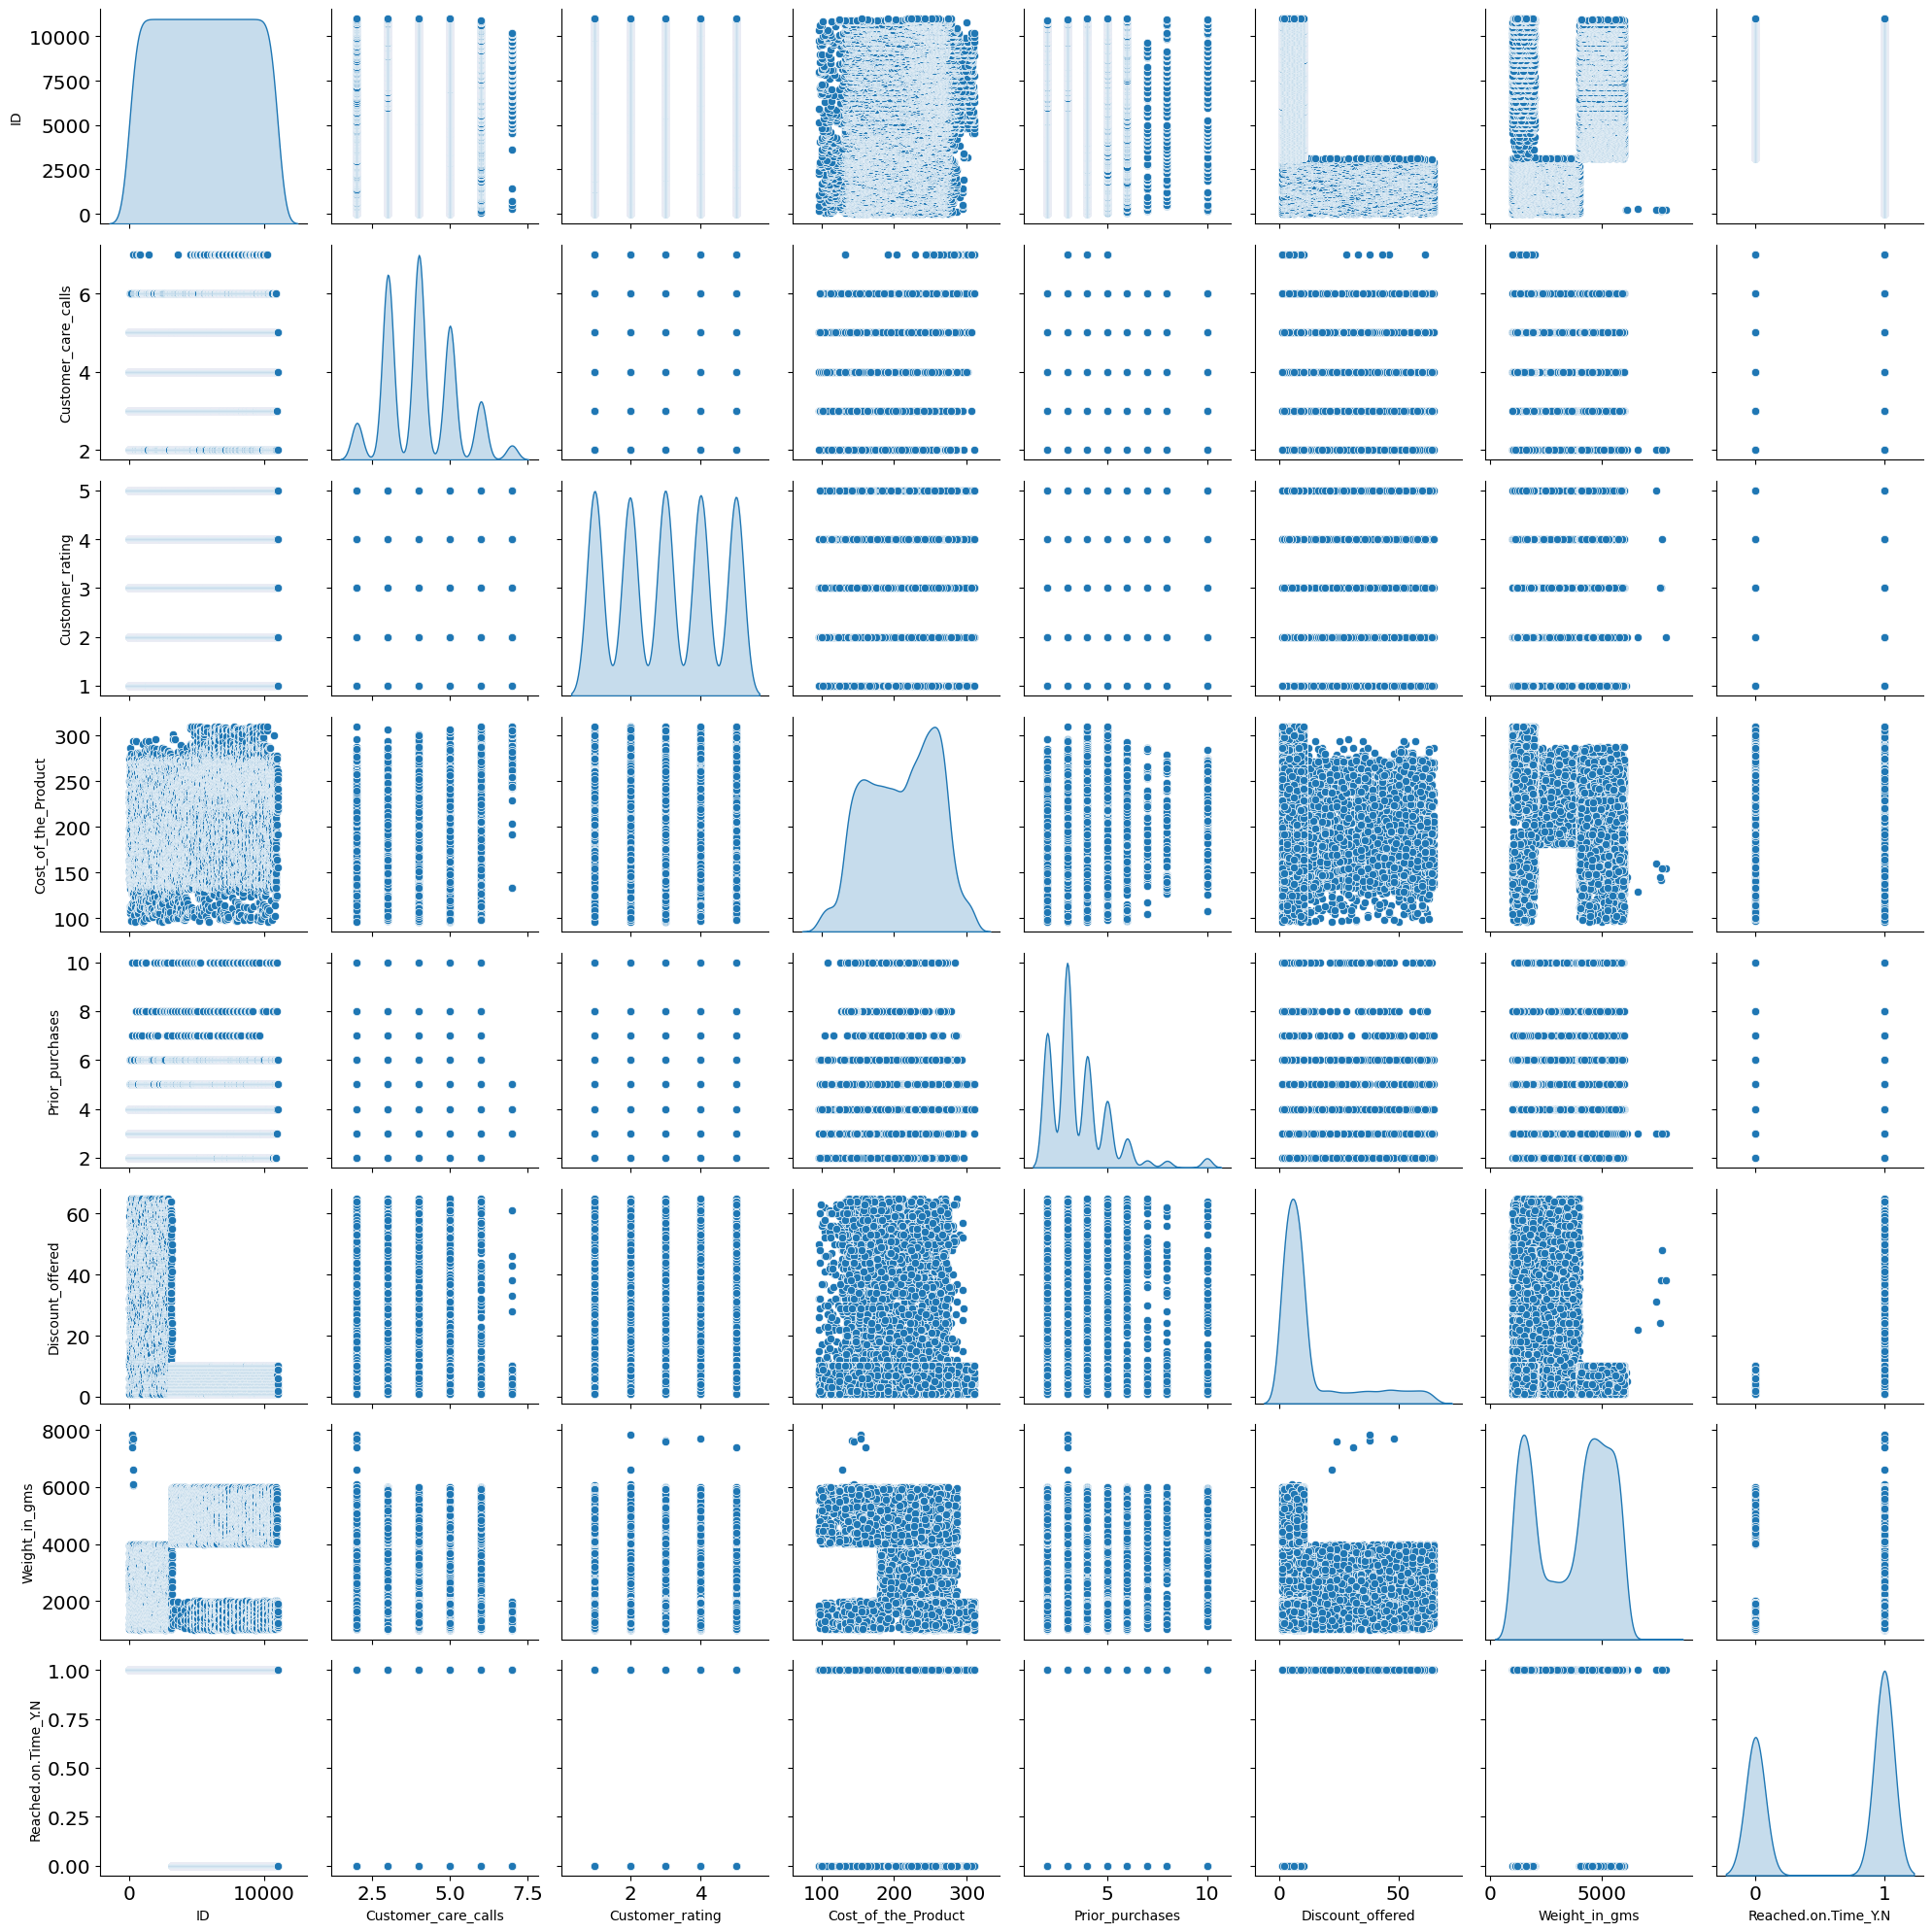

In [39]:
plt.figure(figsize=(15,15))
sns.pairplot(df,  diag_kind='kde')
plt.tight_layout()

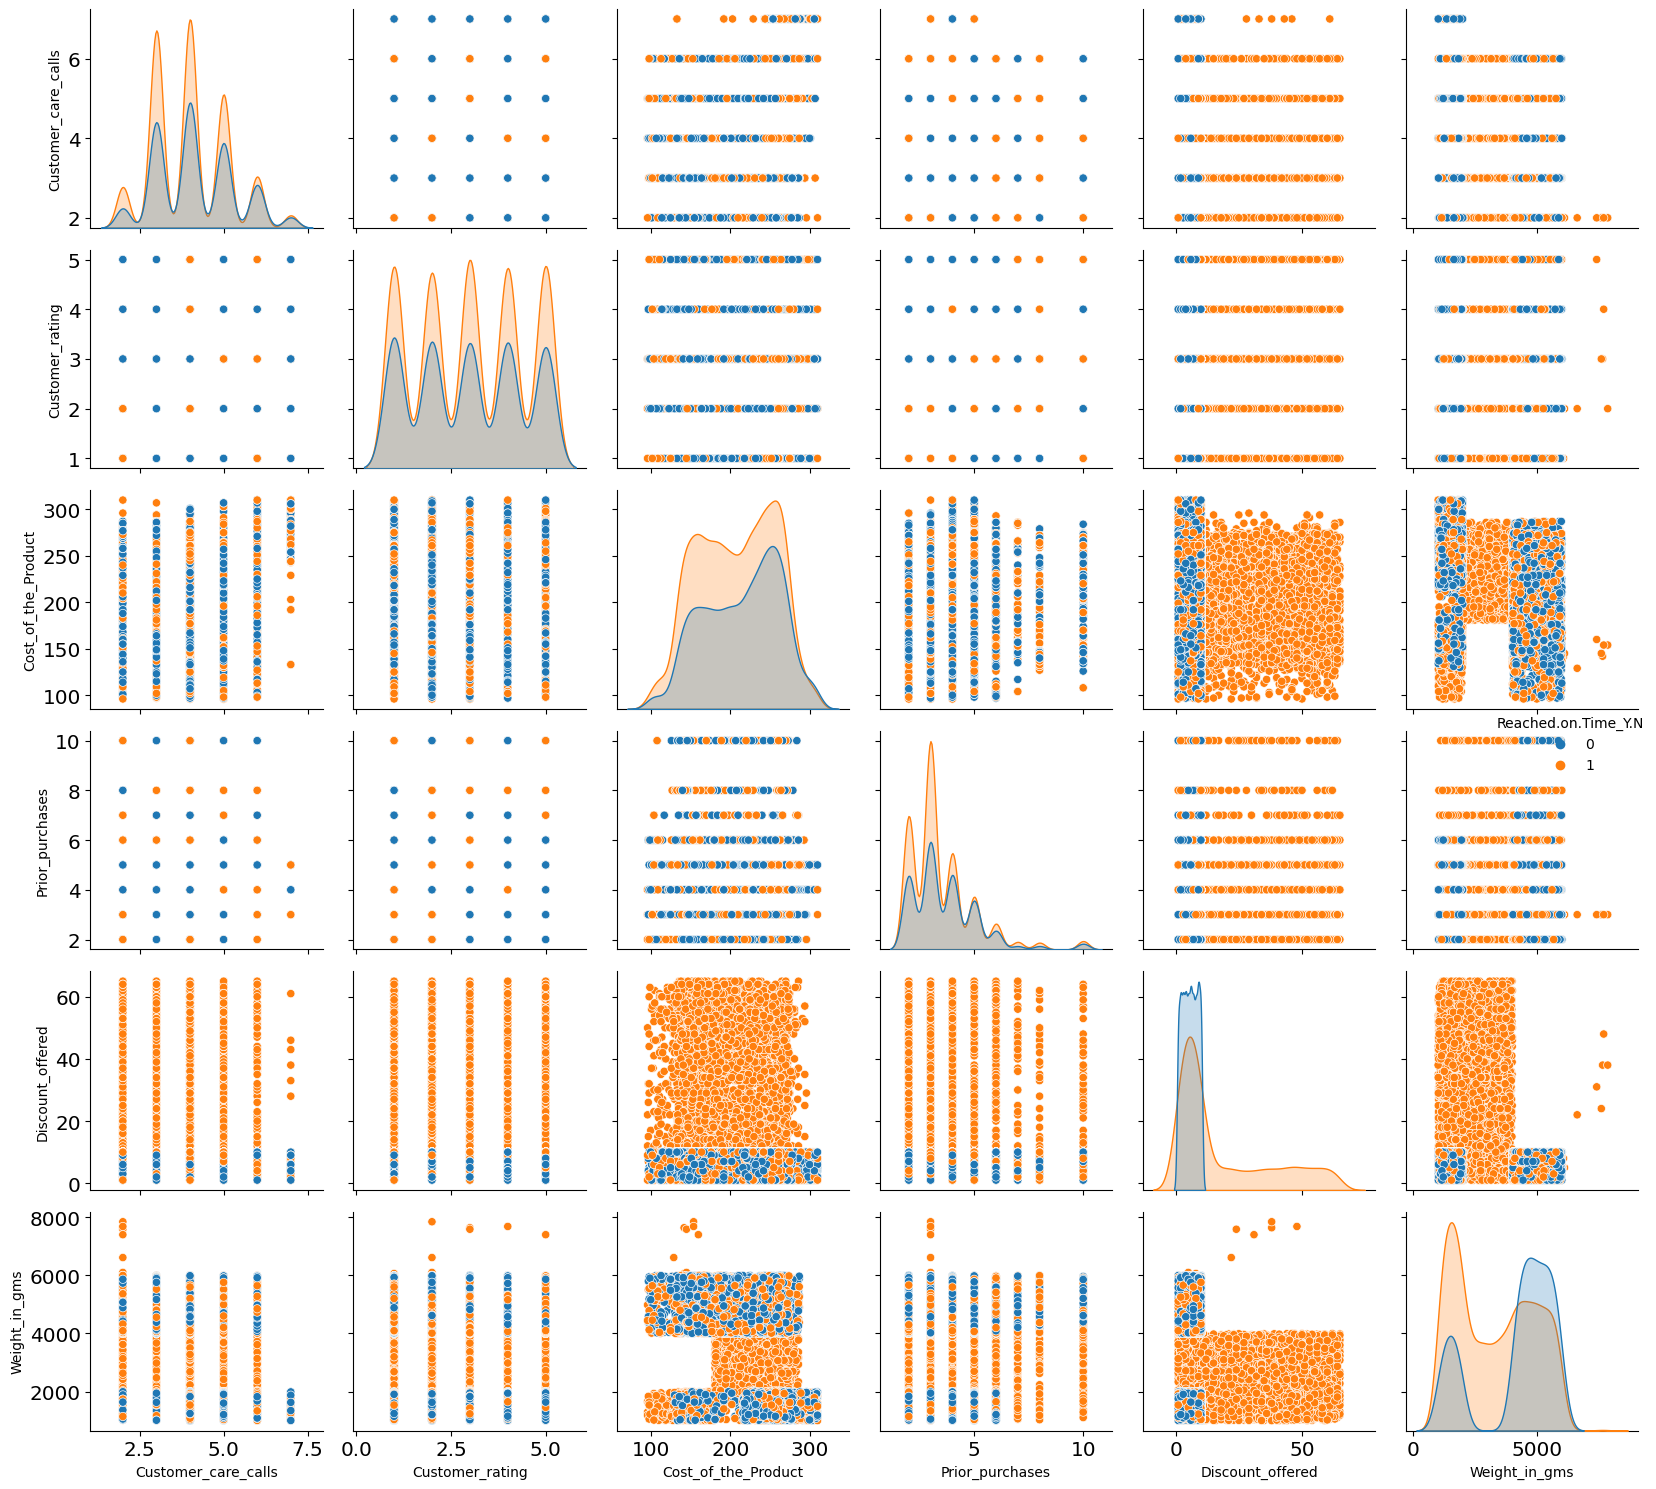

In [36]:
sns.pairplot(df[nums], diag_kind = 'kde', hue='Reached.on.Time_Y.N')
plt.tight_layout()

Dari kumpulan grafik diatas, ada beberapa grafik yang terlihat menarik, diantaranya:
- Hubungan antara **Reached.on.time** dengan **Discount_offered**, terlihat sebagian besar data berada pada nilai Reached.on.time 1 yang artinya terlambat dan hanya barang yang di discount dibawah sekitar 10% yang tidak mengalami keterlambatan
- **Weight_in_gms** dengan **Discount_offered**, dimana terlihat barang-barang yang diberi discount kebanyakan dibawah beban 4000, dan beban pada 4001-6000 hanya mendapat discount maksimal 10% padahal memiliki frekuensi (jumlah barang) yang paling tinggi
- **Weight_in_gms**, **Reached.on.time**, dan **Cost_of_the_Product**. Pada area sekitar median **Weight_in_gms** dimana memiliki frekuensi terendah, data **Reached.on.time** tercatat terlambat semua dan data **Cost_of_the_Product** relatif sangat tinggi

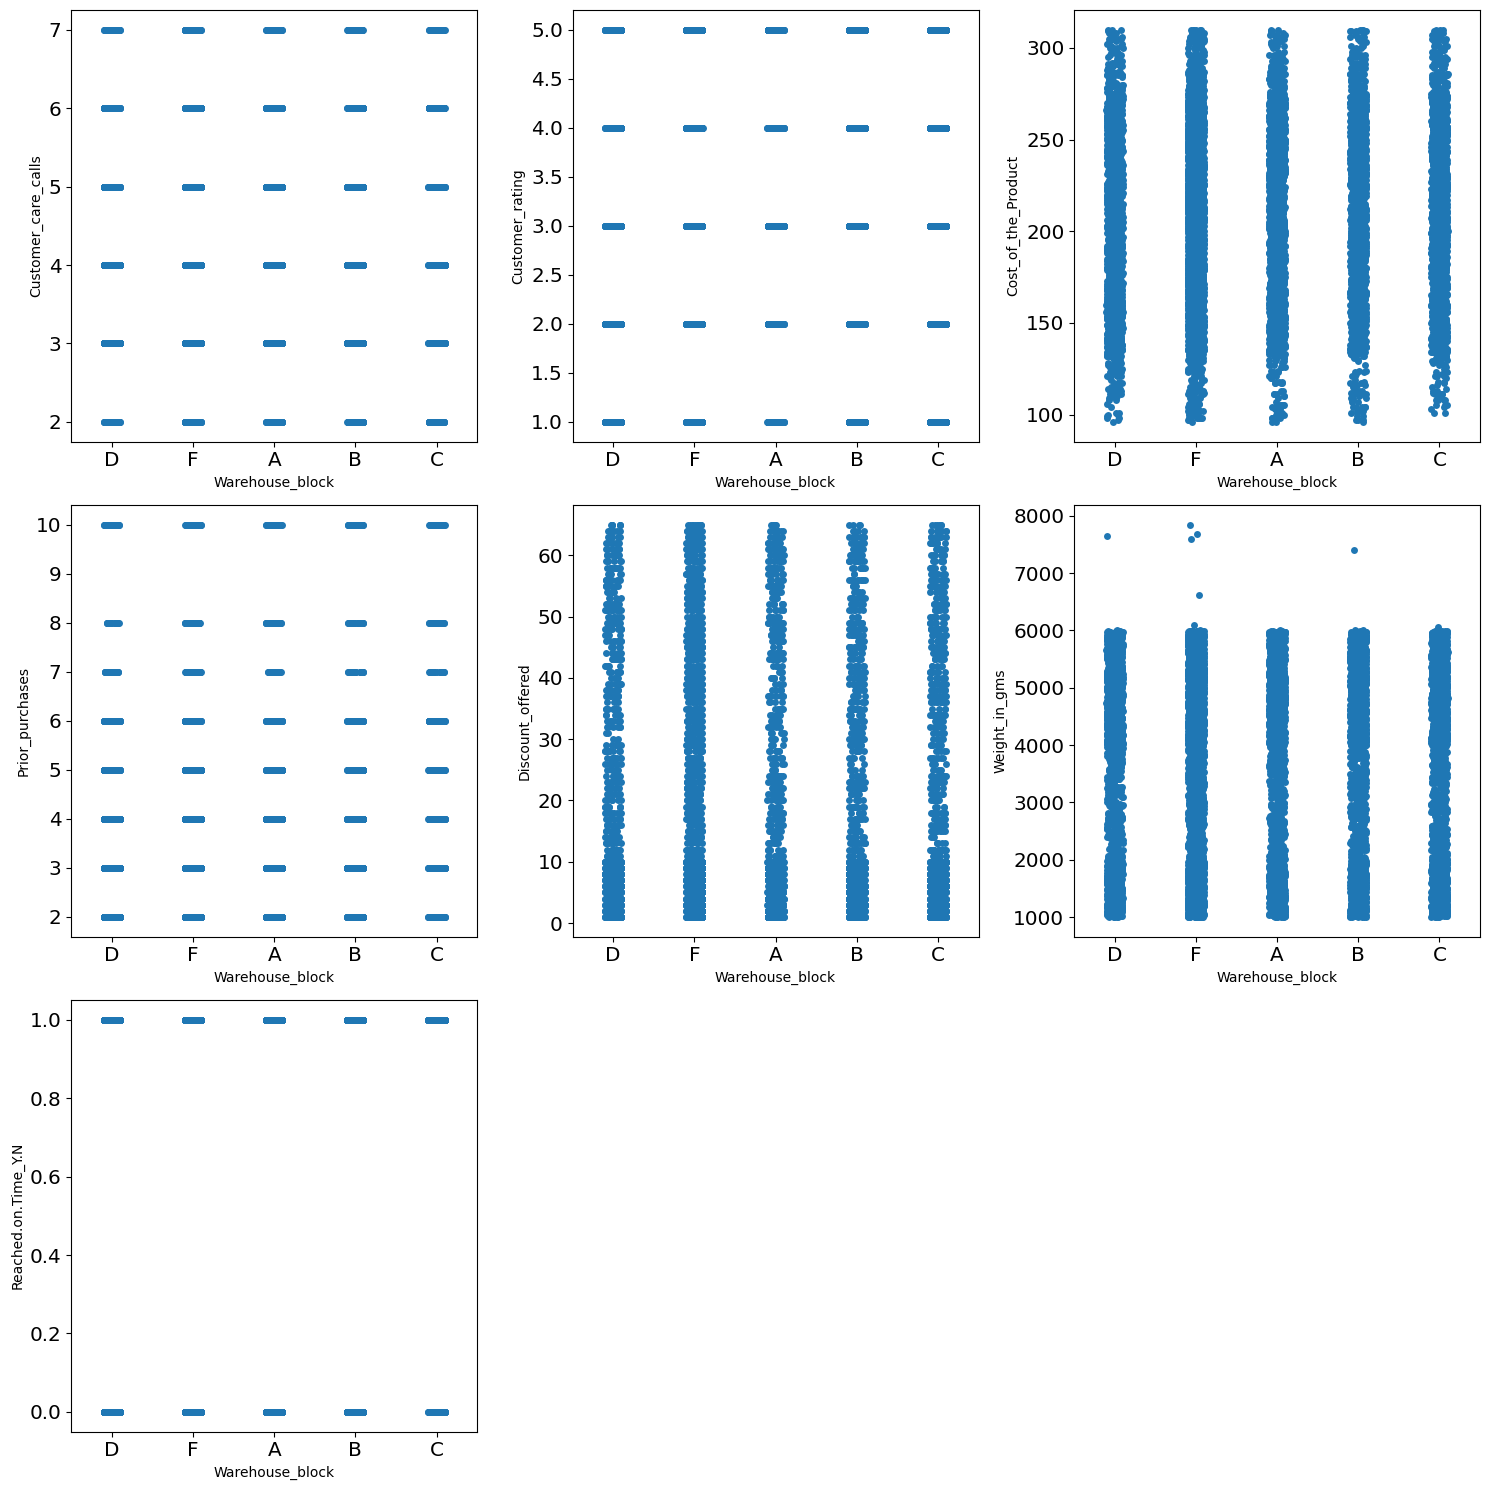

In [40]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=df, x='Warehouse_block', y=nums[i])
    plt.tight_layout()

Dari diagram diatas, beberapa kesimpulan yang dapat diambil:
- Outlier pada hubungan antara **Weight_in_gms** dengan **Warehouse_block** berada pada warehouse E, D, dan B

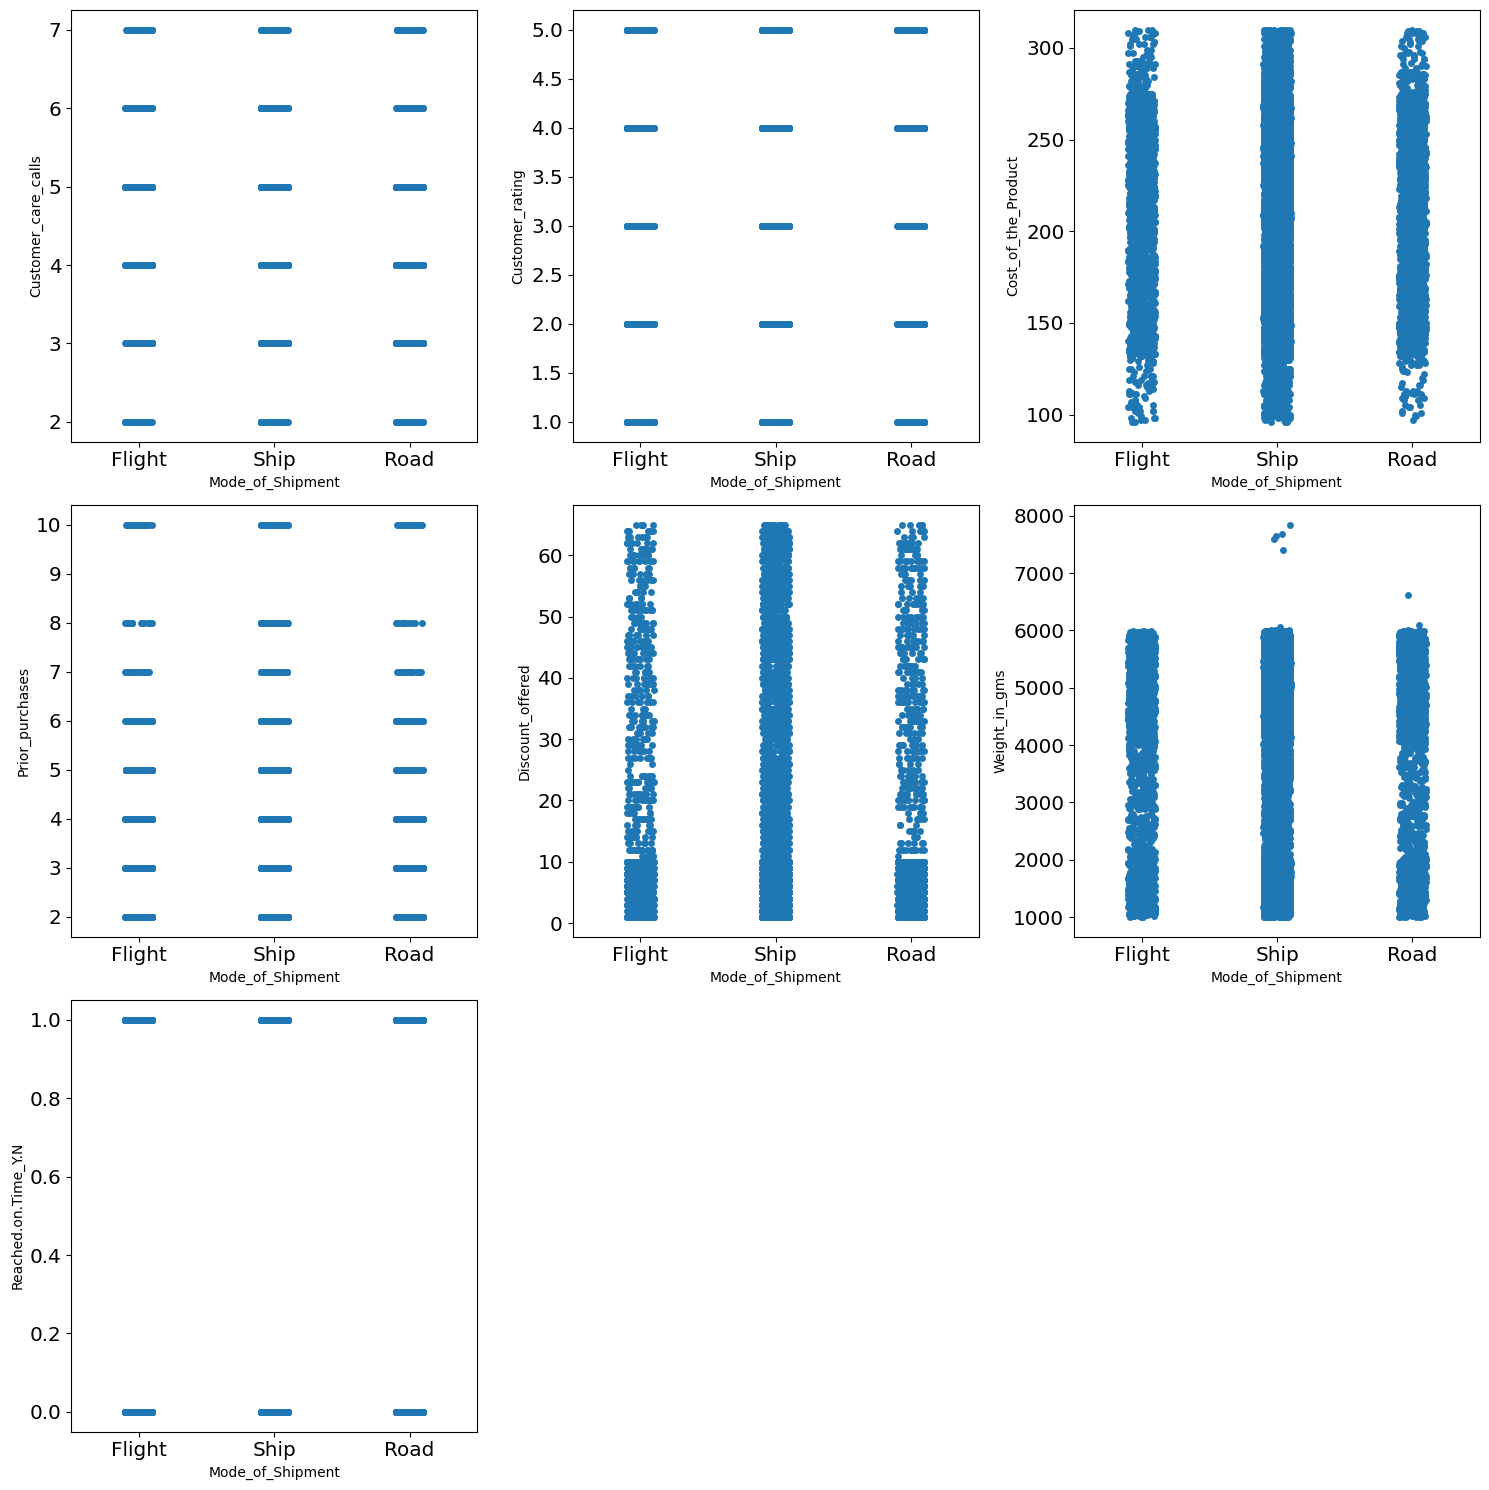

In [41]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=df, x='Mode_of_Shipment', y=nums[i])
    plt.tight_layout()

Sebaran data **Mode_of_shipment** dengan **discount_offered** dan **cost_of_the_product** terpusat pada kategori Ship, namun ini dapat dimaklumi mengingat kategori ship memiliki jumlah data yang jauh lebih tinggi dibanding yang lain

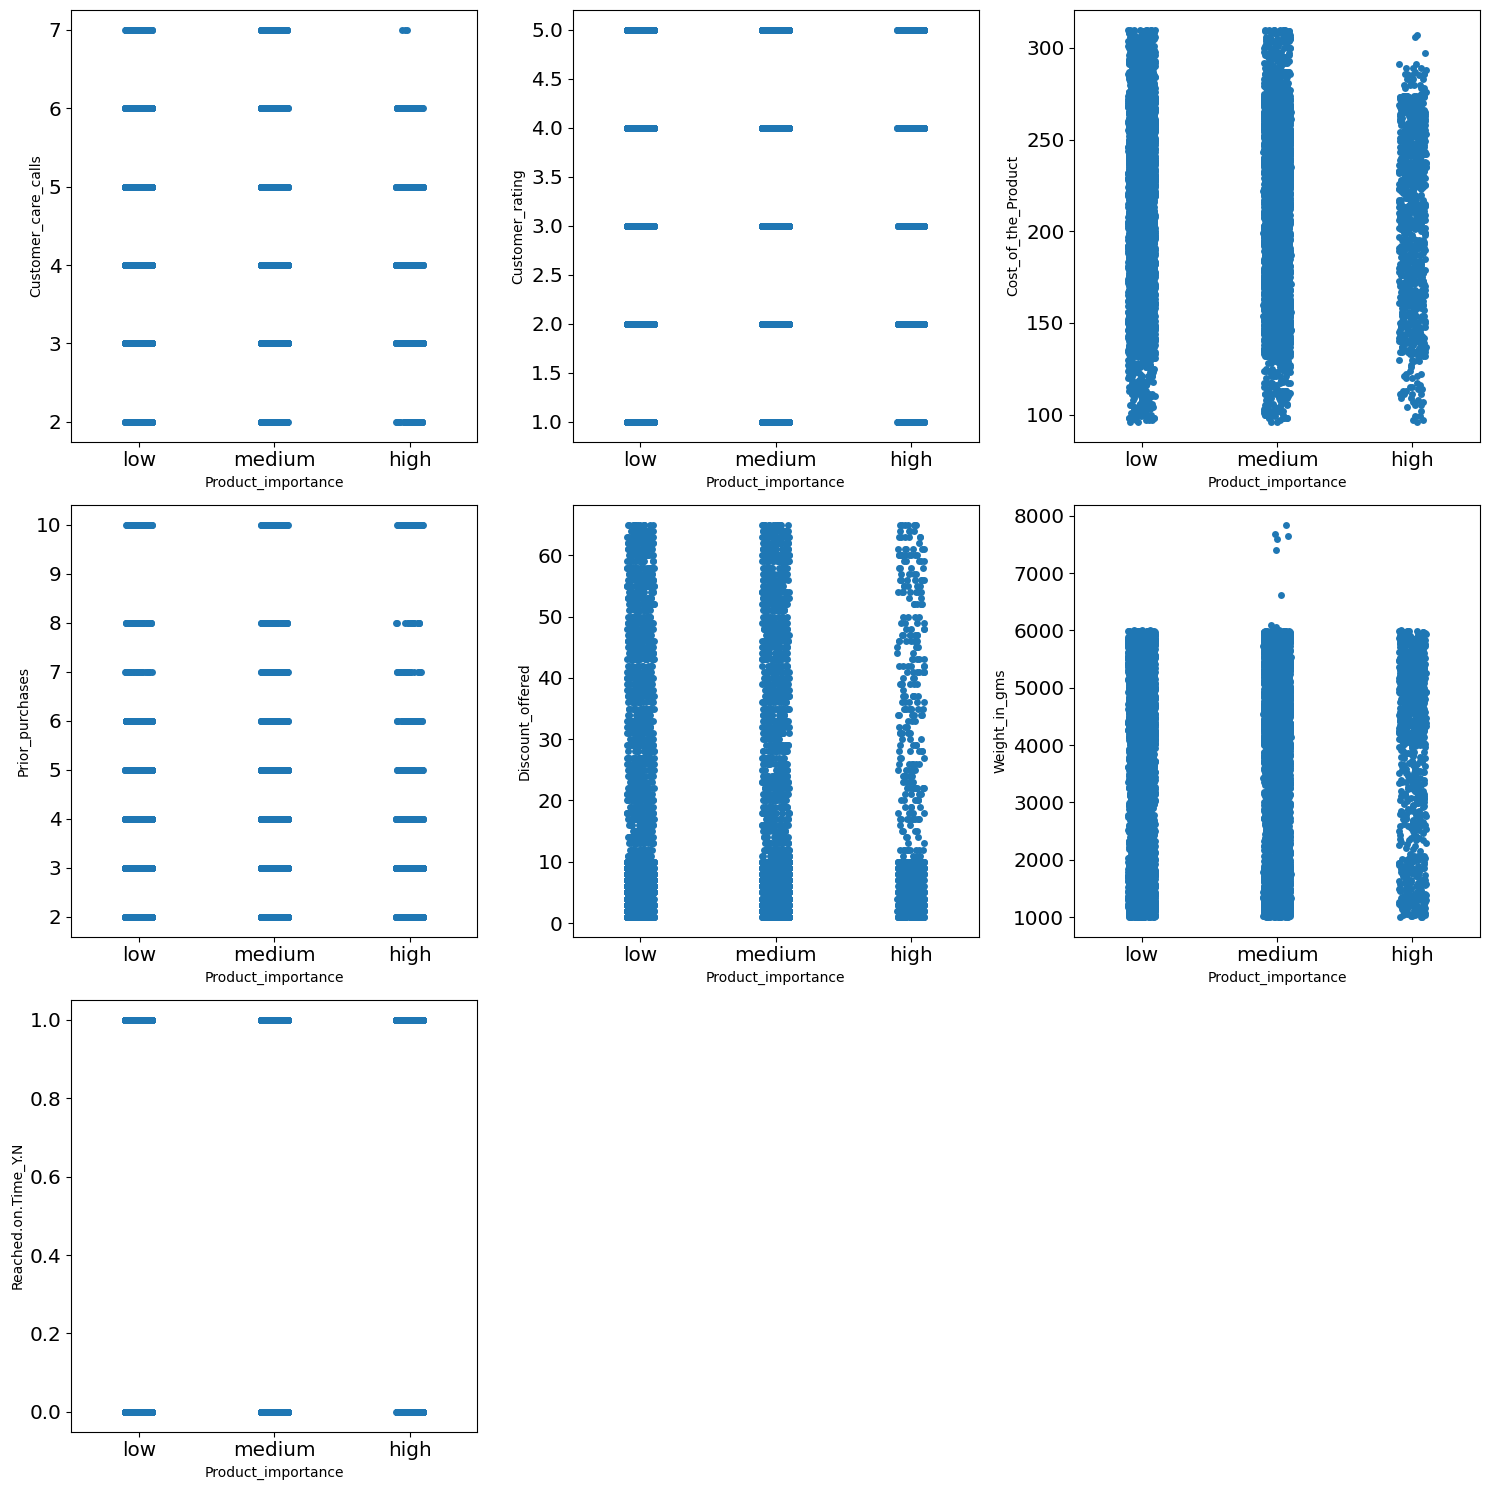

In [42]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=df, x='Product_importance', y=nums[i])
    plt.tight_layout()

- Semua outlier pada **Weight_in_gms** berada di kategori medium dari **Product_importance**
- **Product_importance** high memiliki panggilan **customer_calls** yang lebih sedikit dibanding medium dan low

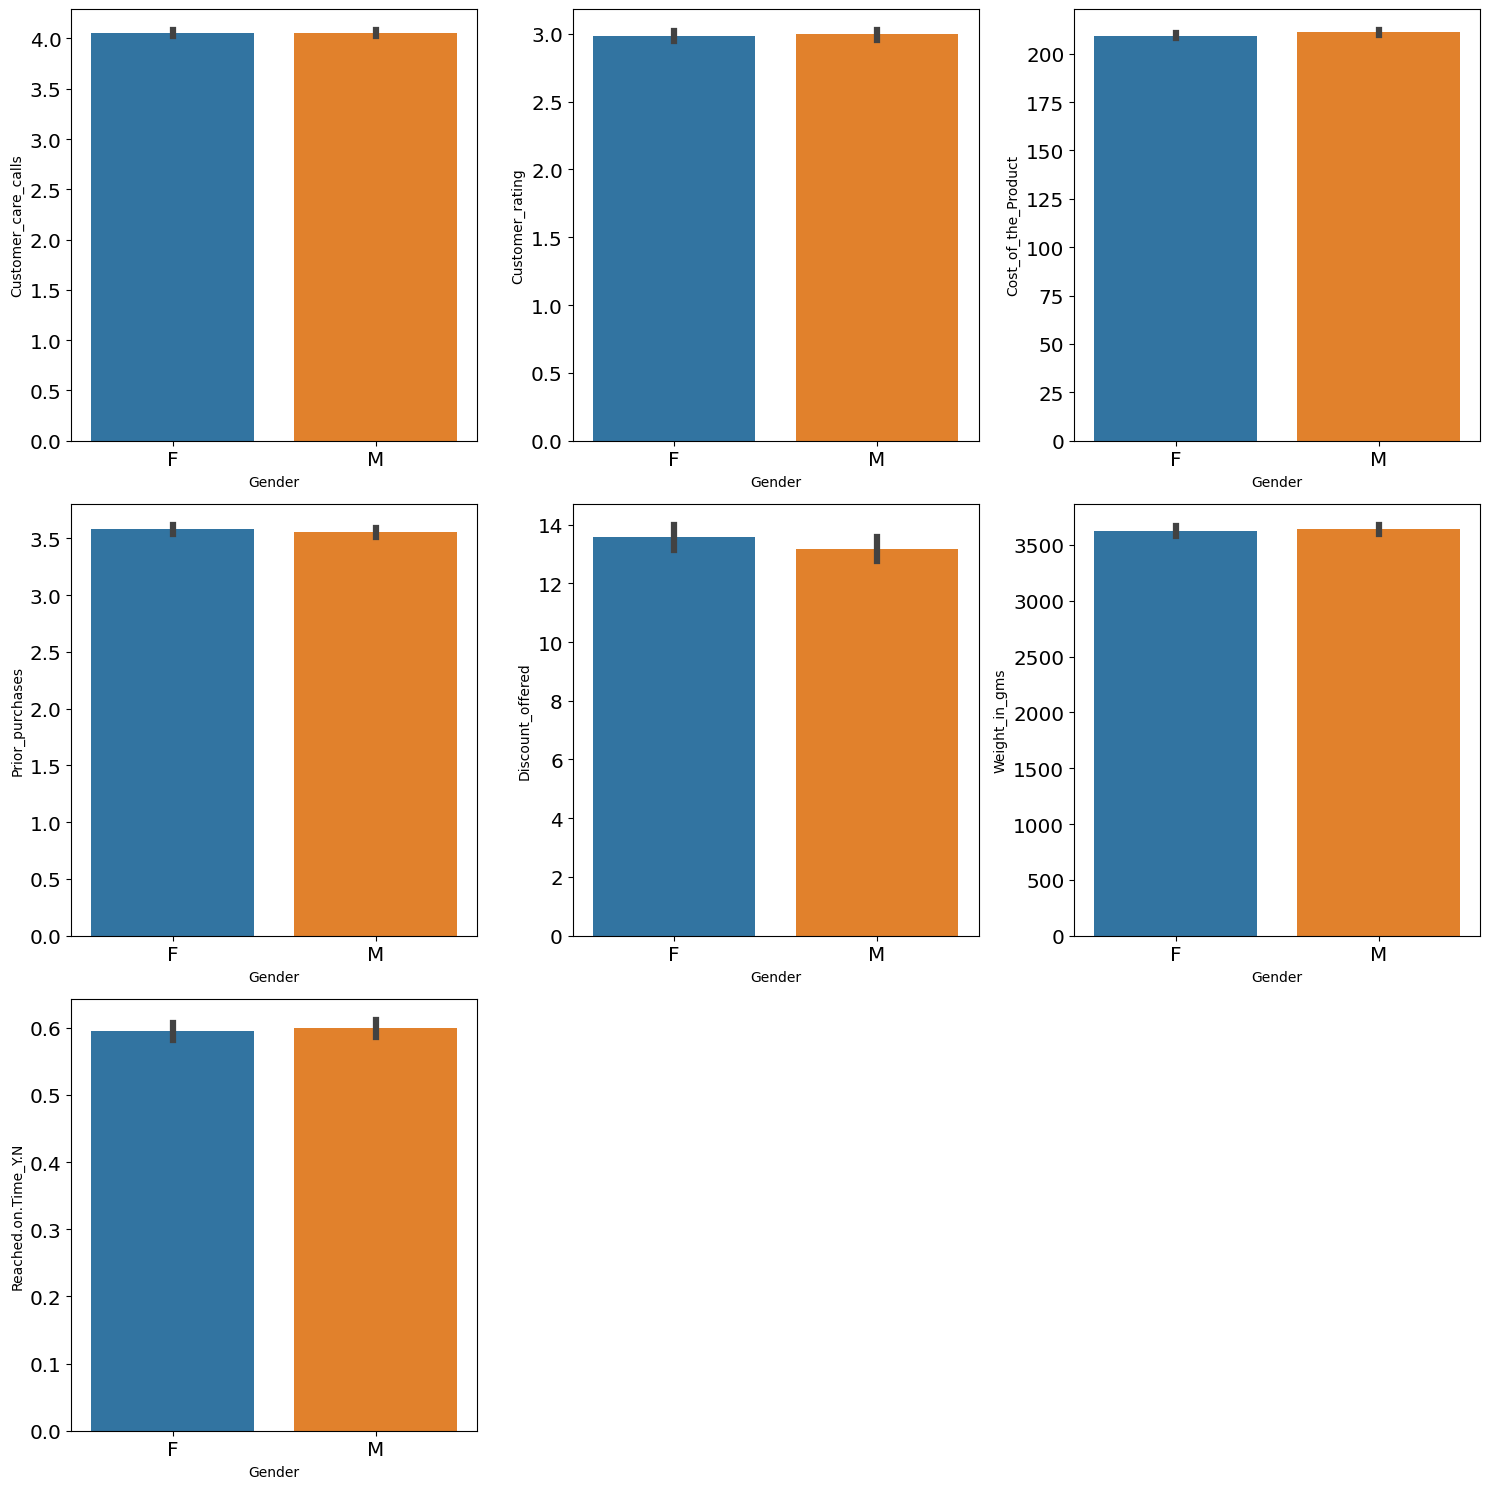

In [44]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    #sns.stripplot(data=df, x='Gender', y=nums[i])
    sns.barplot(data=df, x='Gender', y=nums[i], )
    plt.tight_layout()

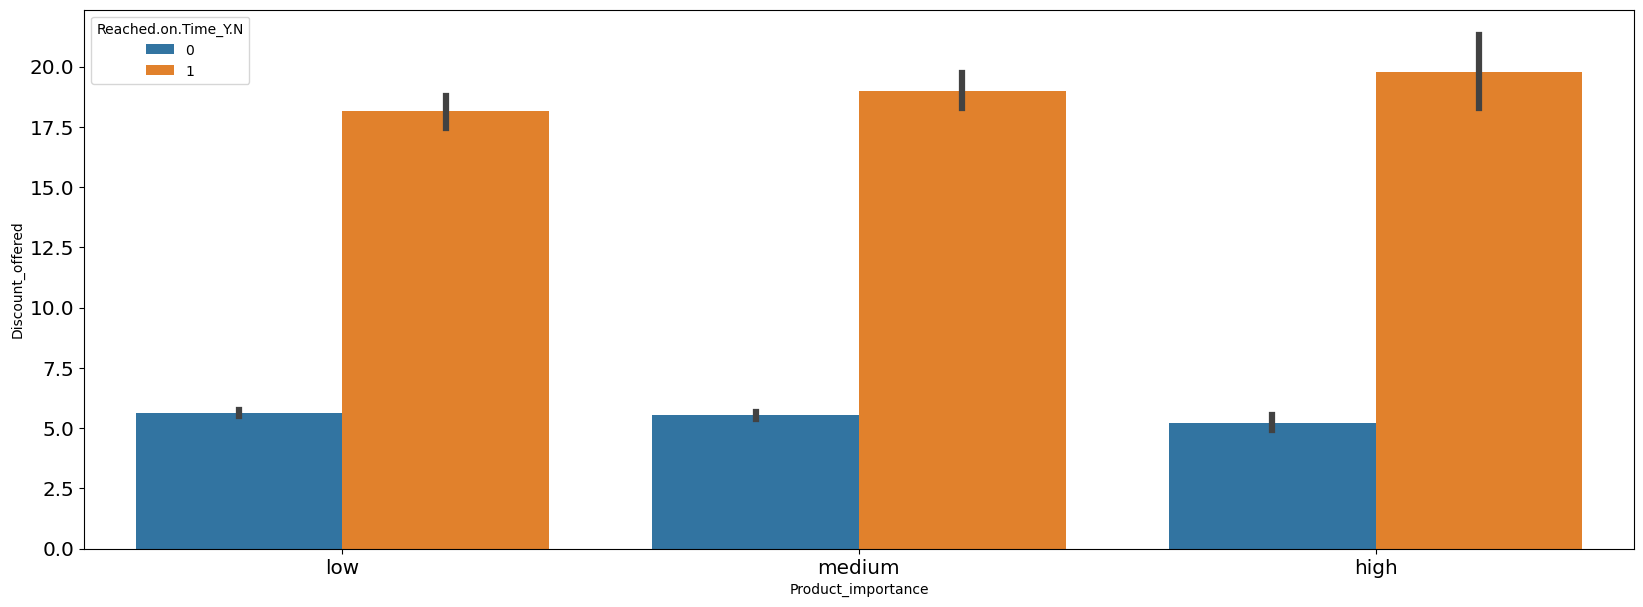

In [46]:
#Hubungan discount, product importance dengan ketepatan waktu
#hue='Reached.on.Time_Y.N' 'Product_importance'
sns.barplot(data=df, x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N')
plt.show()

- Dapat dilihat bahwa tidak peduli tingkat kepentingan produknya, hanya discount maksimum 5% yang dapat diantar tepat waktu, selebihnya datang terlambat
- Produk dengan kepentingan High memiliki discount yang sedikit lebih tinggi dibanding yang lain